VERSIÓN FINAL Y COMPLETA




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC



In [ ]:
sns.set_theme(style="whitegrid")

# <b> PREPROCESADO </b>

## <b> Descripción del dataset </b>

Cargamos el dataset en memoria

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practicas/Extracción de conocimiento/Proyecto final/superstore_data.csv')

Visualizamos los primeros 5 registros del dataset

In [ ]:
df.head()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3   11/5/2014        0        10  ...                0                 0   
4    8/4/2014        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   

   NumStorePurchases  NumWebVisitsMonth  Response  Complain  
0                  6                  1         1         0  
1                  7                  5         1         0  
2                  5                  2         0         0  
3                  2                  7         0         0  
4                  2                  7         1         0  

[5 rows x 22 columns]

Y su estructura

In [ ]:
df.shape

(2240, 22)

Podemos empezar mirando un poco las estadisticas descriptivas de las variables para echar un primer vistazo a los valores

In [ ]:
df.describe()

Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth     Response     Complain  
count        2240.000000  2240.000000  2240.000000  
mean            5.316518     0.149107     0.009375  
std             2.426645     0.356274     0.096391  
min             0.000000     0.000000     0.000000  
25%             3.000000     0.000000     0.000000  
50%             6.000000     0.000000     0.000000  
75%             7.000000     0.000000     0.000000  
max            20.000000     1.000000     1.000000

En la siguiente tabla podemos ver por cada variable:
- los tipos de variables, si numericas (interas o discretas) o categoricas
- la cardinalidad, o sea cuantas entradas unicas hay por cada variable
- la cantidad de valores nulos

In [ ]:

def analyze_dataframe(df):
    """
    Analyzes a Pandas DataFrame and returns a summary table with data types, cardinality, and null counts.
    """

    summary_data = []
    for col in df.columns:
        dtype = df[col].dtype
        cardinality = df[col].nunique()
        null_count = df[col].isnull().sum()
        summary_data.append([col, dtype, cardinality, null_count])

    summary_df = pd.DataFrame(summary_data, columns=['Atributo', 'Tipo de dato', 'Cardinalidad', 'Valores Nulos'])
    return summary_df

# Assuming 'df' is your DataFrame (as defined in the provided code)
summary_table = analyze_dataframe(df)
summary_table

Atributo Tipo de dato  Cardinalidad  Valores Nulos
0                    Id        int64          2240              0
1            Year_Birth        int64            59              0
2             Education       object             5              0
3        Marital_Status       object             8              0
4                Income      float64          1974             24
5               Kidhome        int64             3              0
6              Teenhome        int64             3              0
7           Dt_Customer       object           663              0
8               Recency        int64           100              0
9              MntWines        int64           776              0
10            MntFruits        int64           158              0
11      MntMeatProducts        int64           558              0
12      MntFishProducts        int64           182              0
13     MntSweetProducts        int64           177              0
14         MntGoldProds        int64           213              0
15    NumDealsPurchases        int64            15              0
16      NumWebPurchases        int64            15              0
17  NumCatalogPurchases        int64            14              0
18    NumStorePurchases        int64            14              0
19    NumWebVisitsMonth        int64            16              0
20             Response        int64             2              0
21             Complain        int64             2              0

Esta tabla nos cuenta muchas cosas sobre el dataset:

- hay diferentes tipos de datos: object, interos y flotantes.
- la cardinalidad nos dice que hay algunas columnas con valores binarios y otras con muchas más observaciones.
- la última columna nos enseña que hay una columna con valores nulos que habrá que manejar.

## Preparación del dataset

Cambiamos el type de la columna Dt_Customer de object a datetime

In [ ]:
# prompt: transformame dt_customer en formato date

# Convert 'Dt_Customer' to datetime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y')


In [ ]:
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

Quitamos la columna ID del dataset, que no aporta ninguna información util para la analisis.

In [ ]:
df = df.drop('Id', axis=1)

## Distribución de variables


:Generamos histogramas con curva de densidad y boxplot para darnos cuenta de la distribución original de las variables del dataset.

<Figure size 1000x600 with 0 Axes>

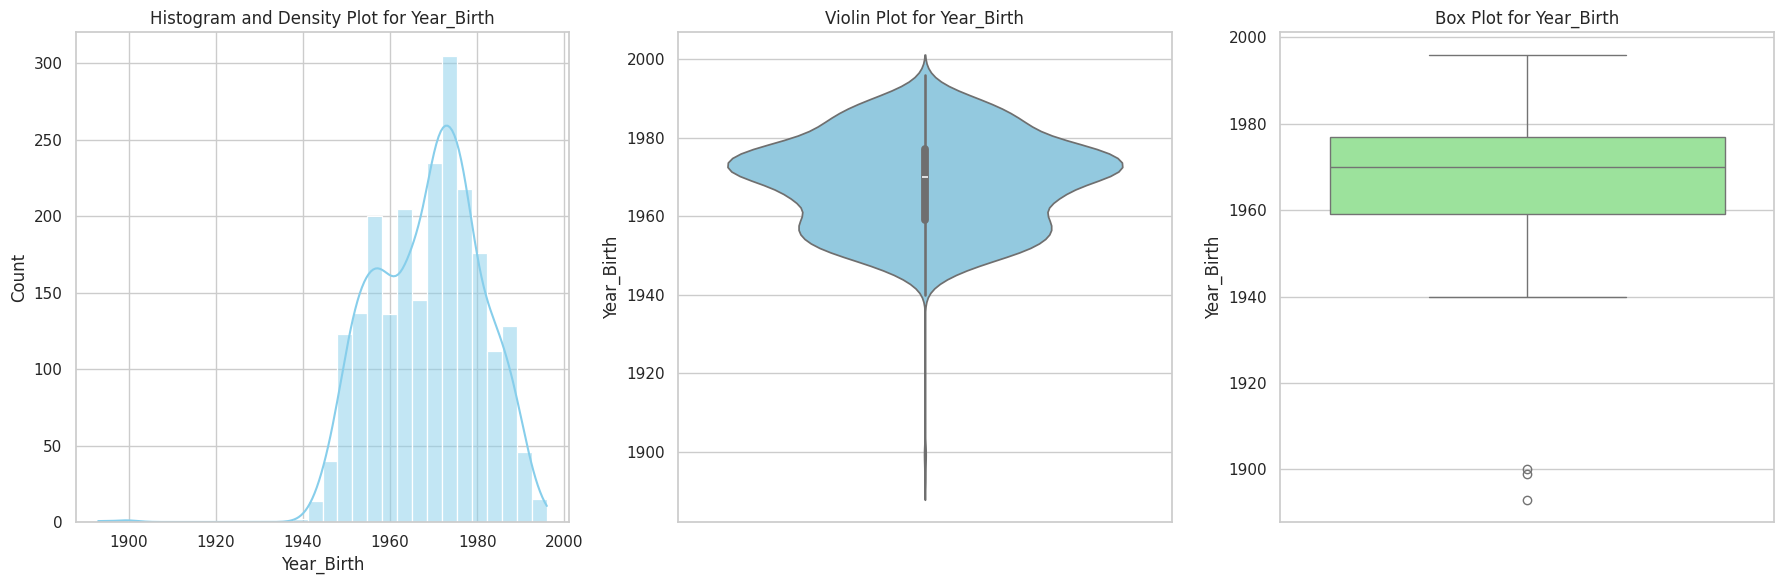

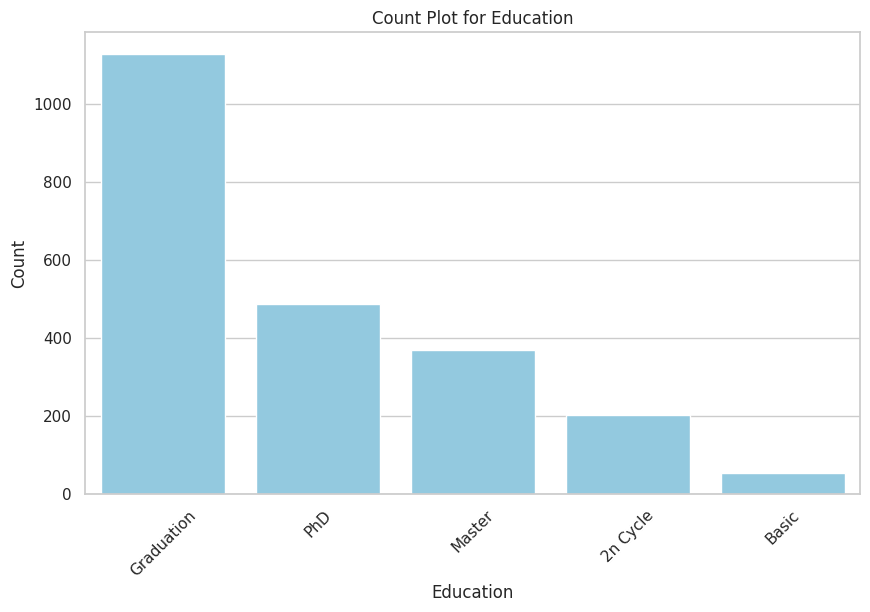

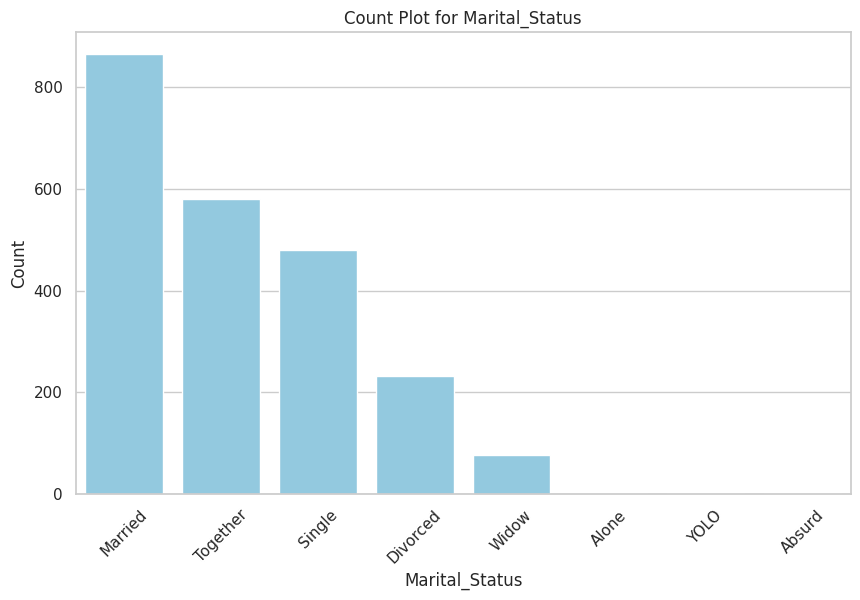

<Figure size 1000x600 with 0 Axes>

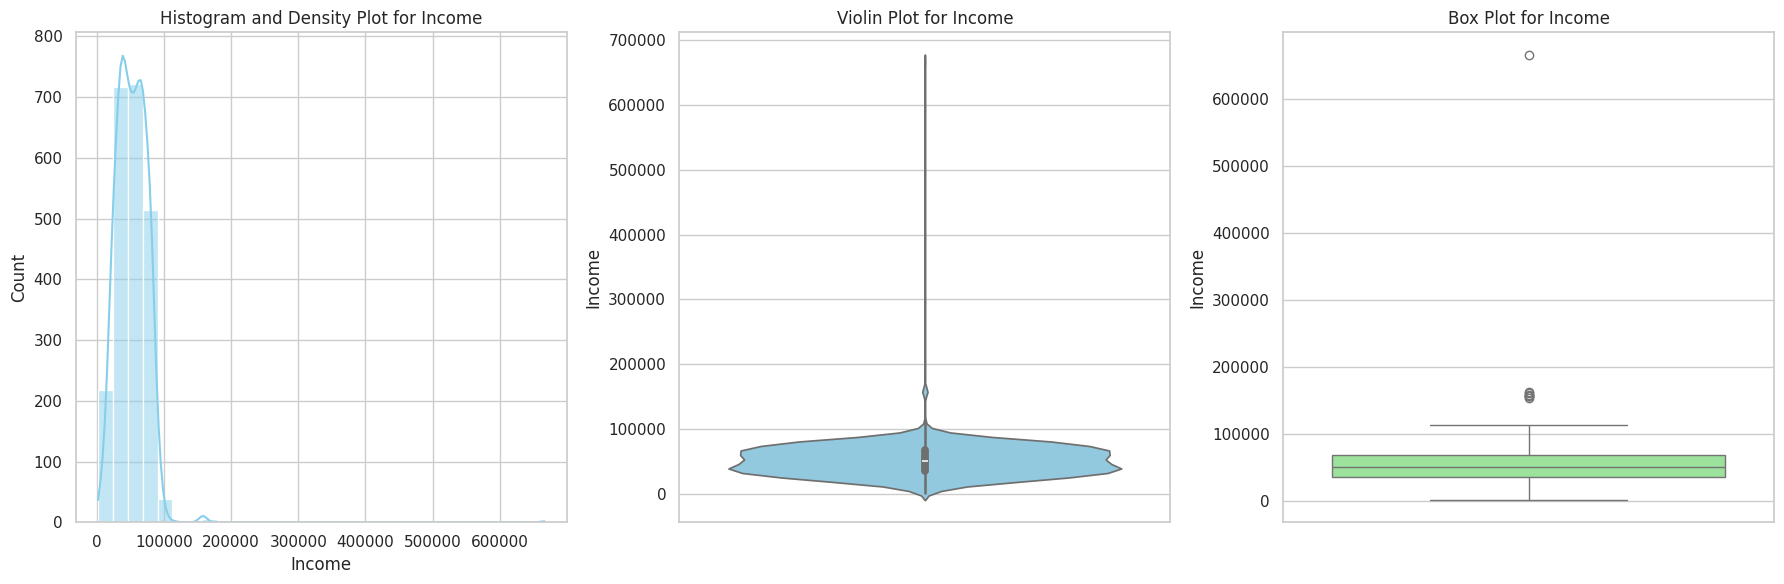

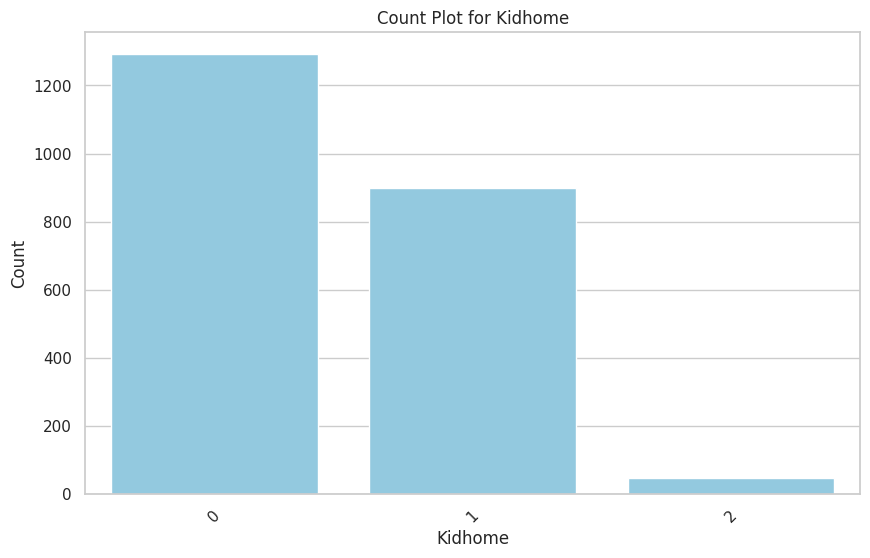

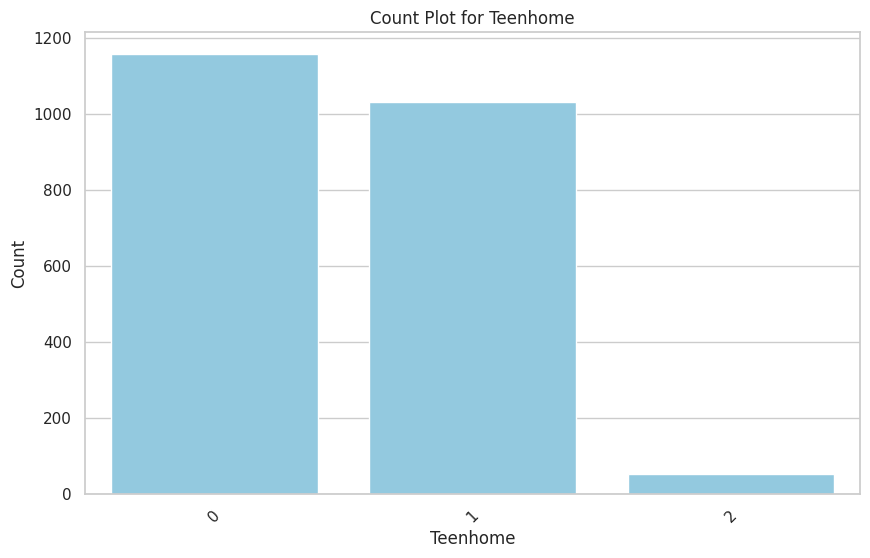

<Figure size 1000x600 with 0 Axes>

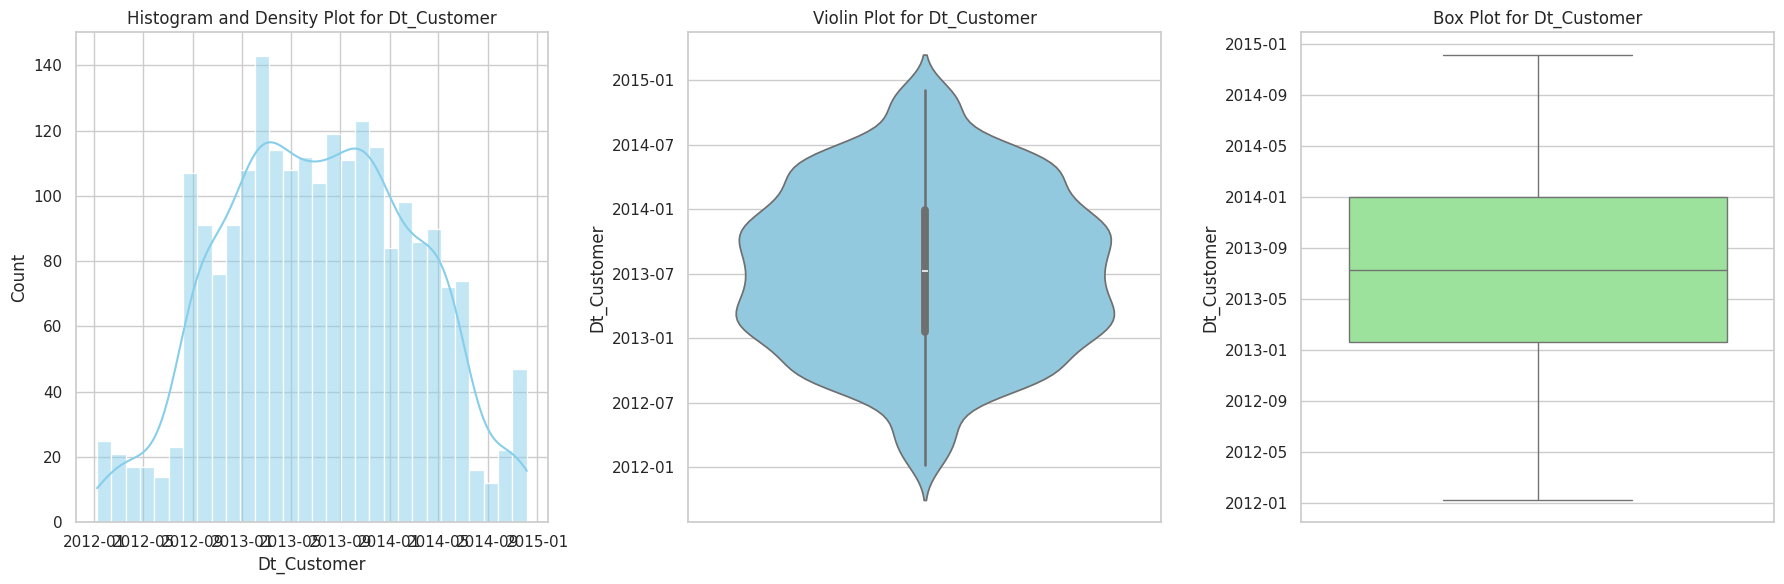

<Figure size 1000x600 with 0 Axes>

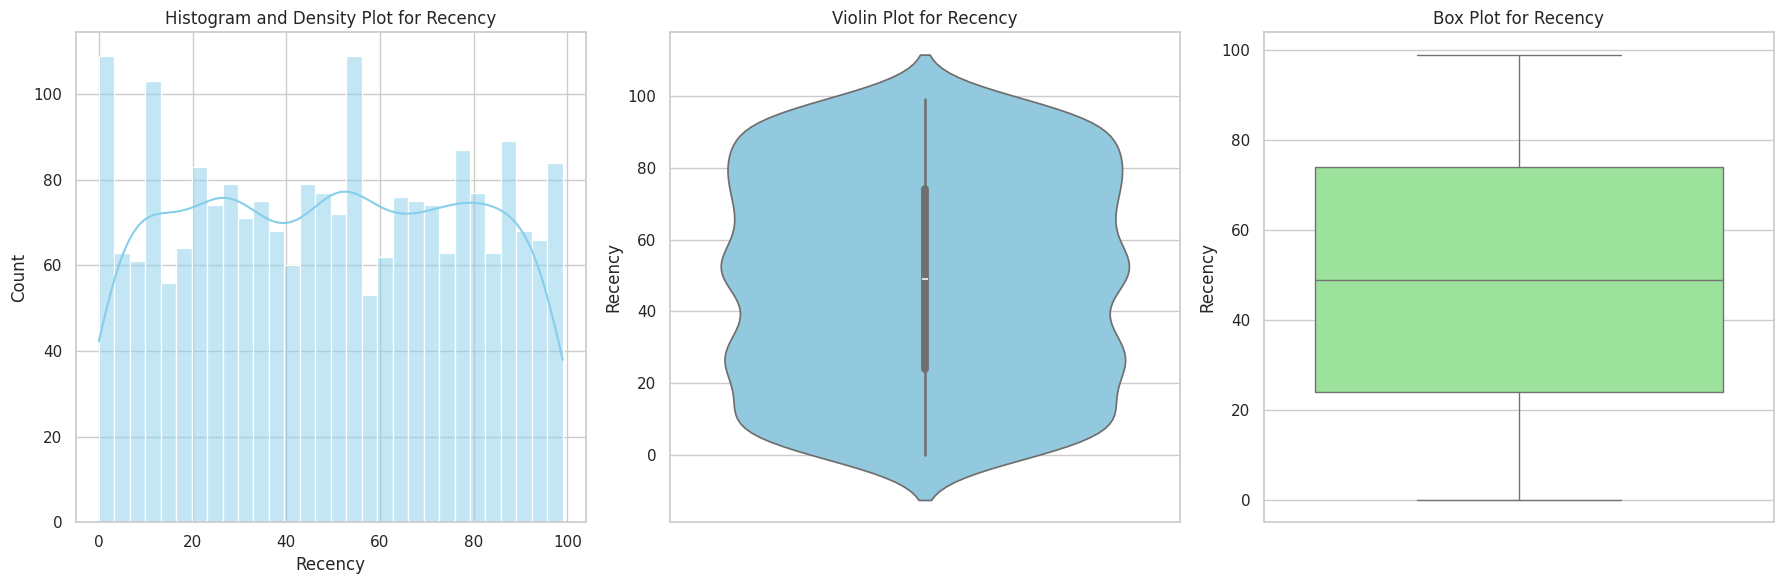

<Figure size 1000x600 with 0 Axes>

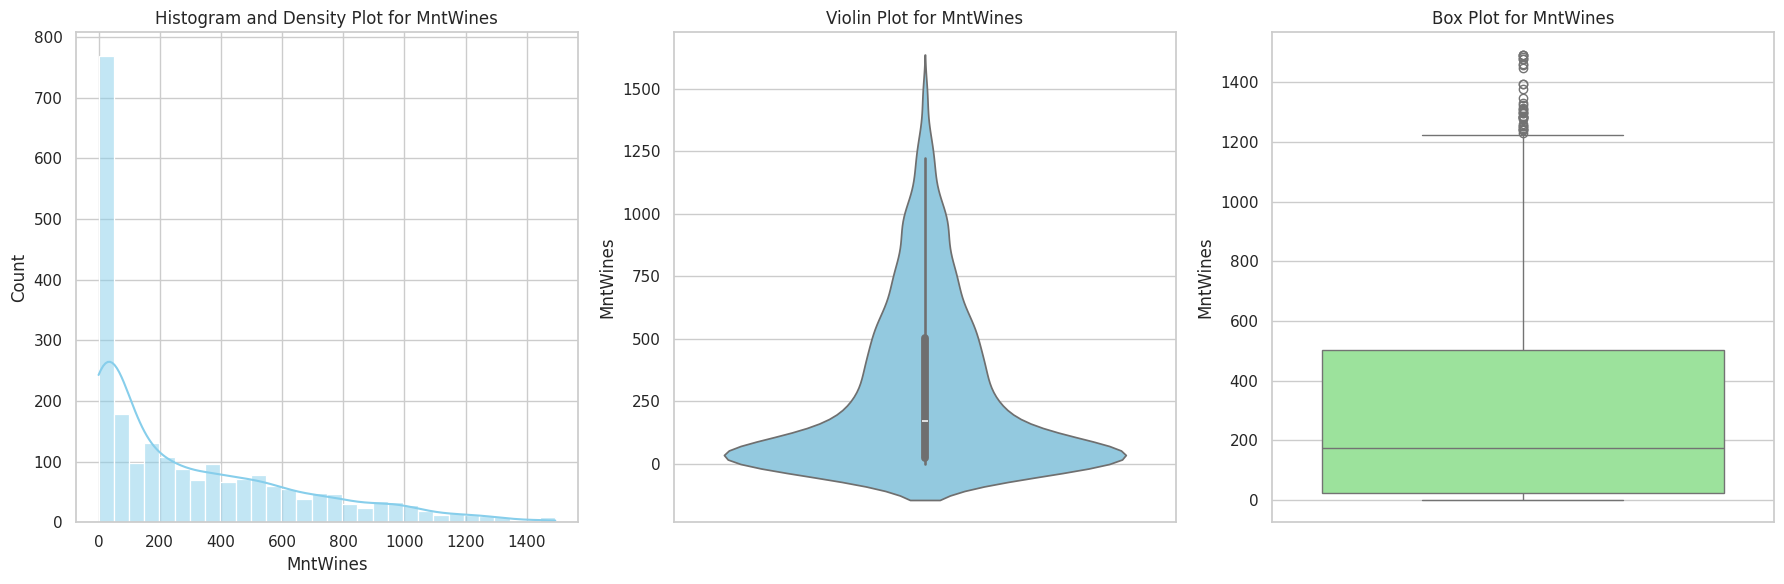

<Figure size 1000x600 with 0 Axes>

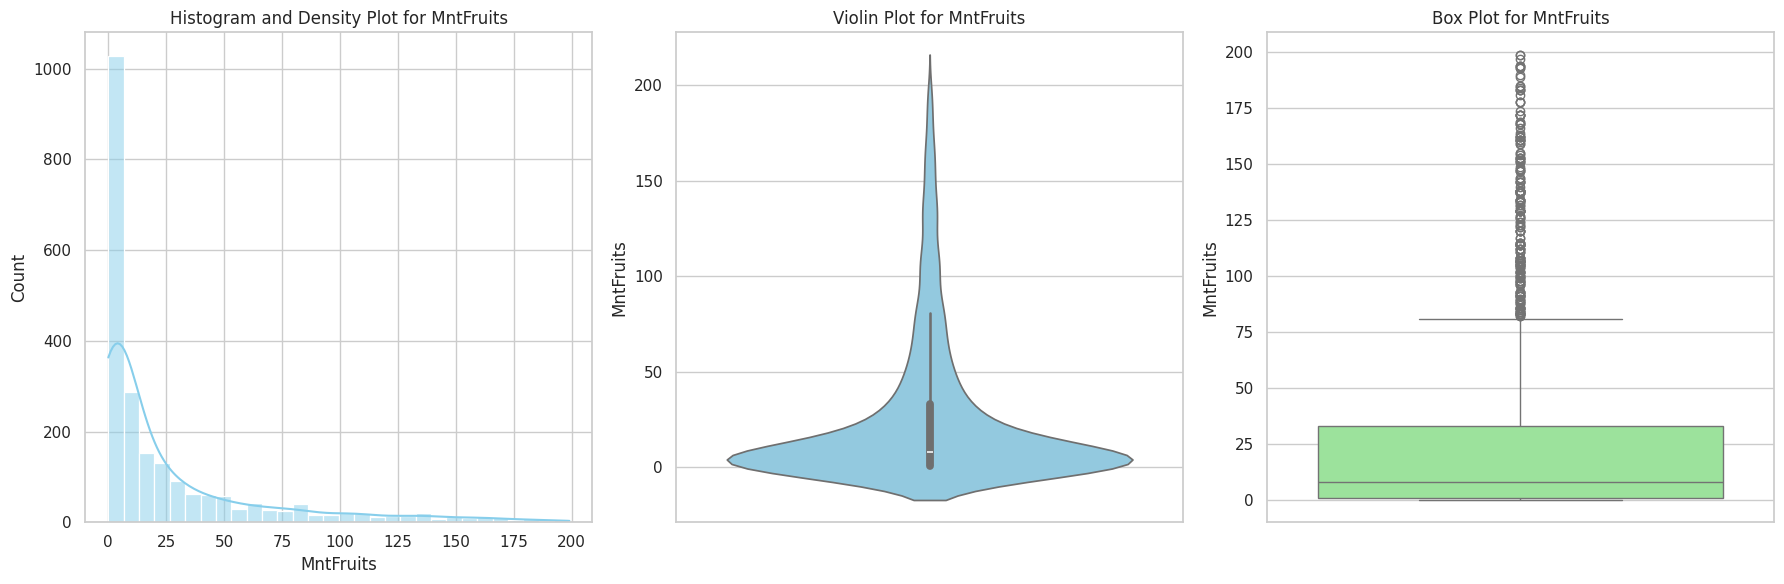

<Figure size 1000x600 with 0 Axes>

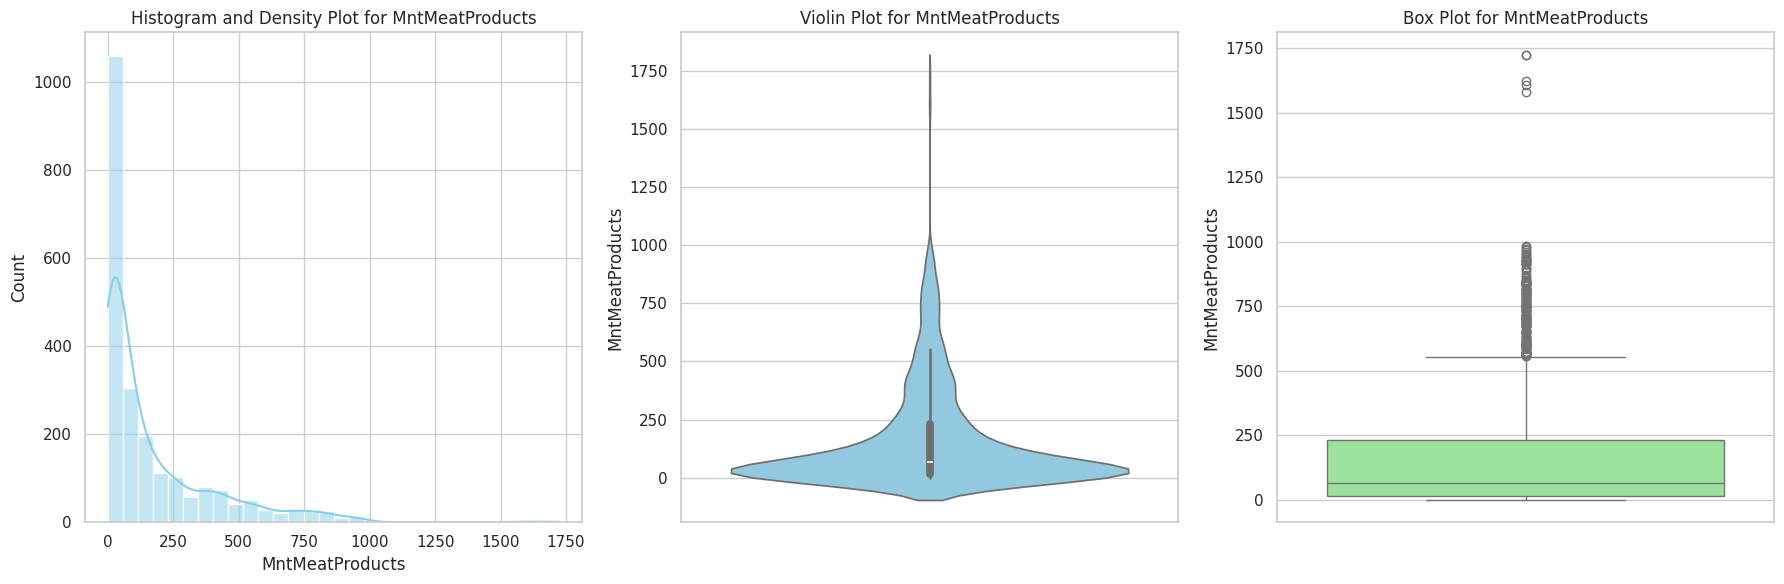

<Figure size 1000x600 with 0 Axes>

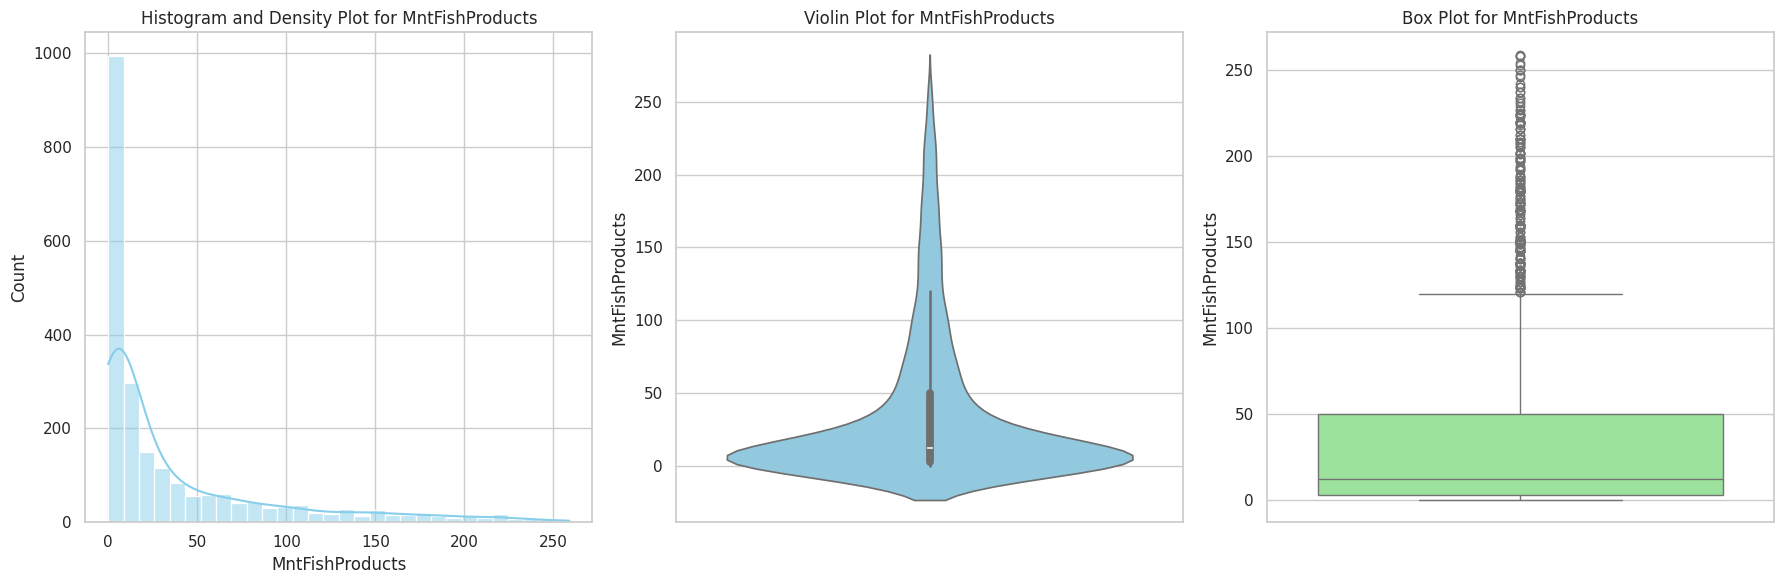

<Figure size 1000x600 with 0 Axes>

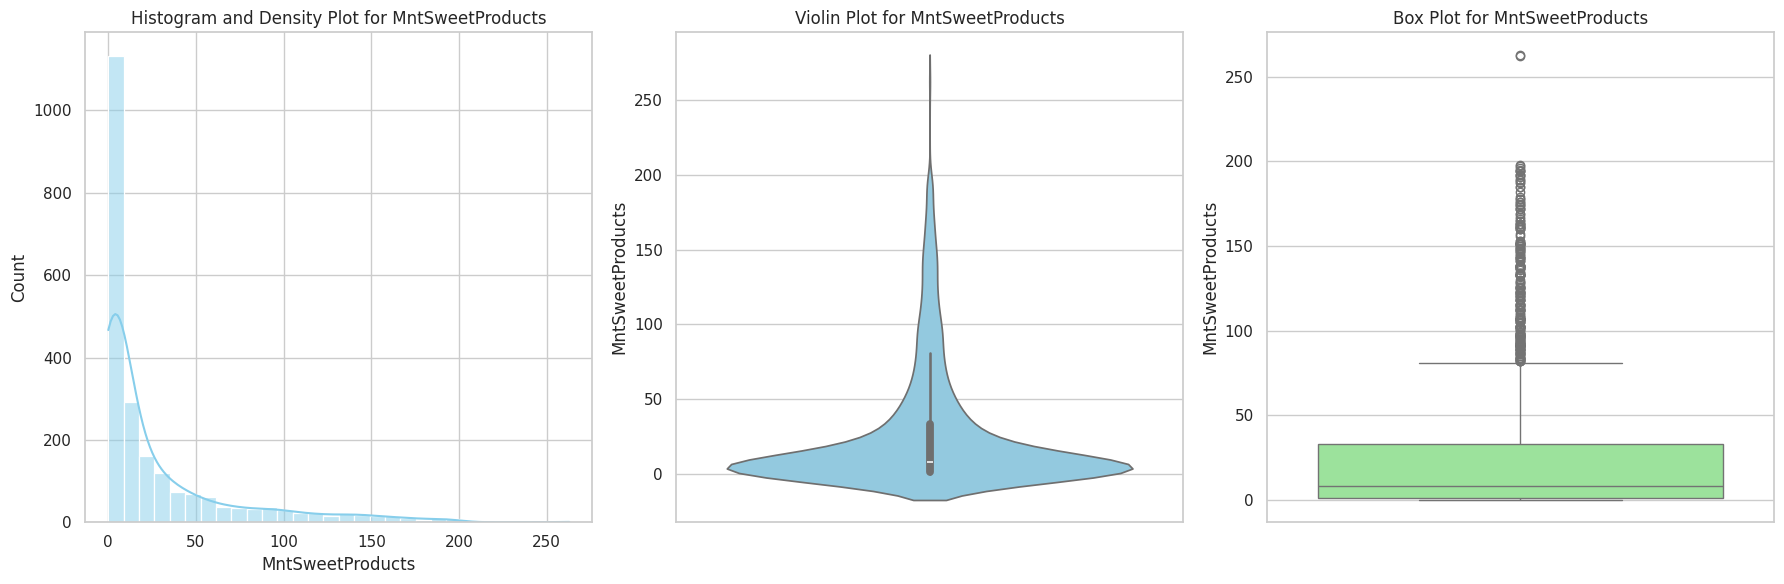

<Figure size 1000x600 with 0 Axes>

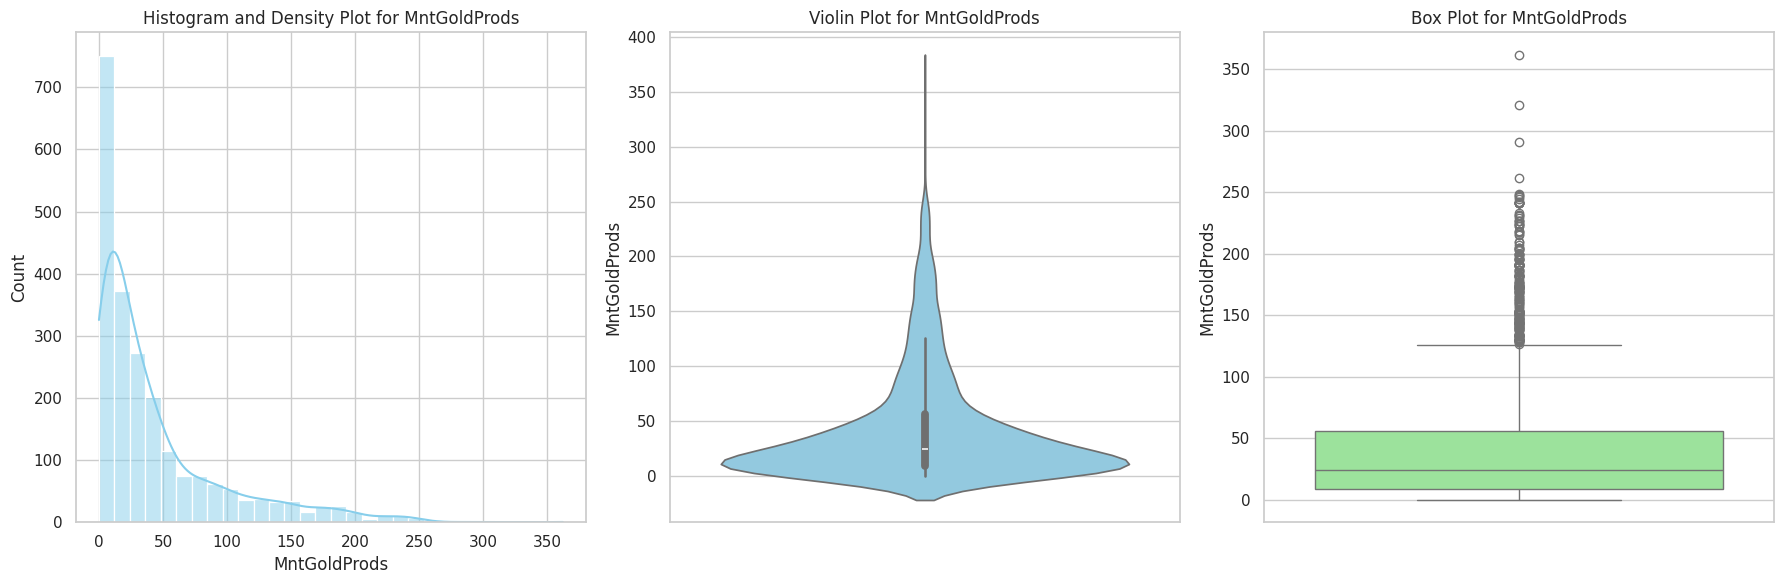

<Figure size 1000x600 with 0 Axes>

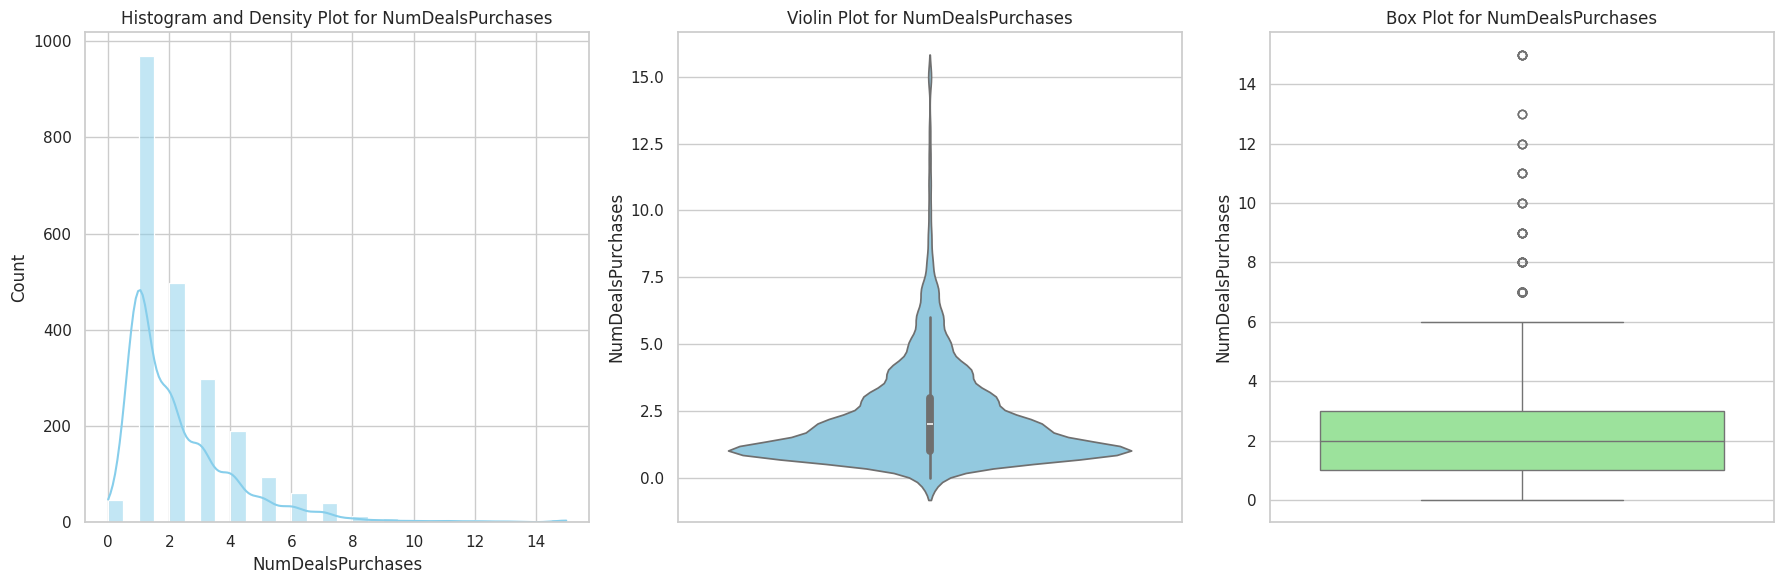

<Figure size 1000x600 with 0 Axes>

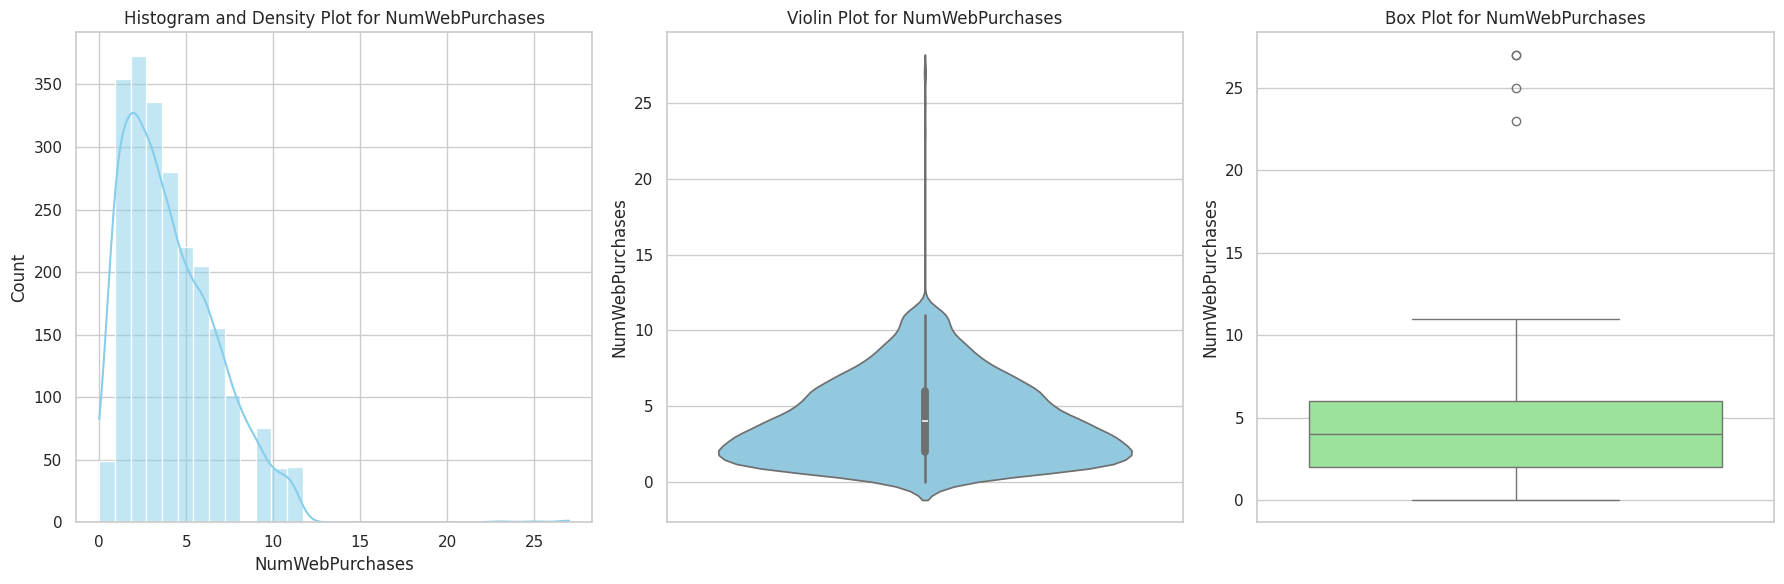

<Figure size 1000x600 with 0 Axes>

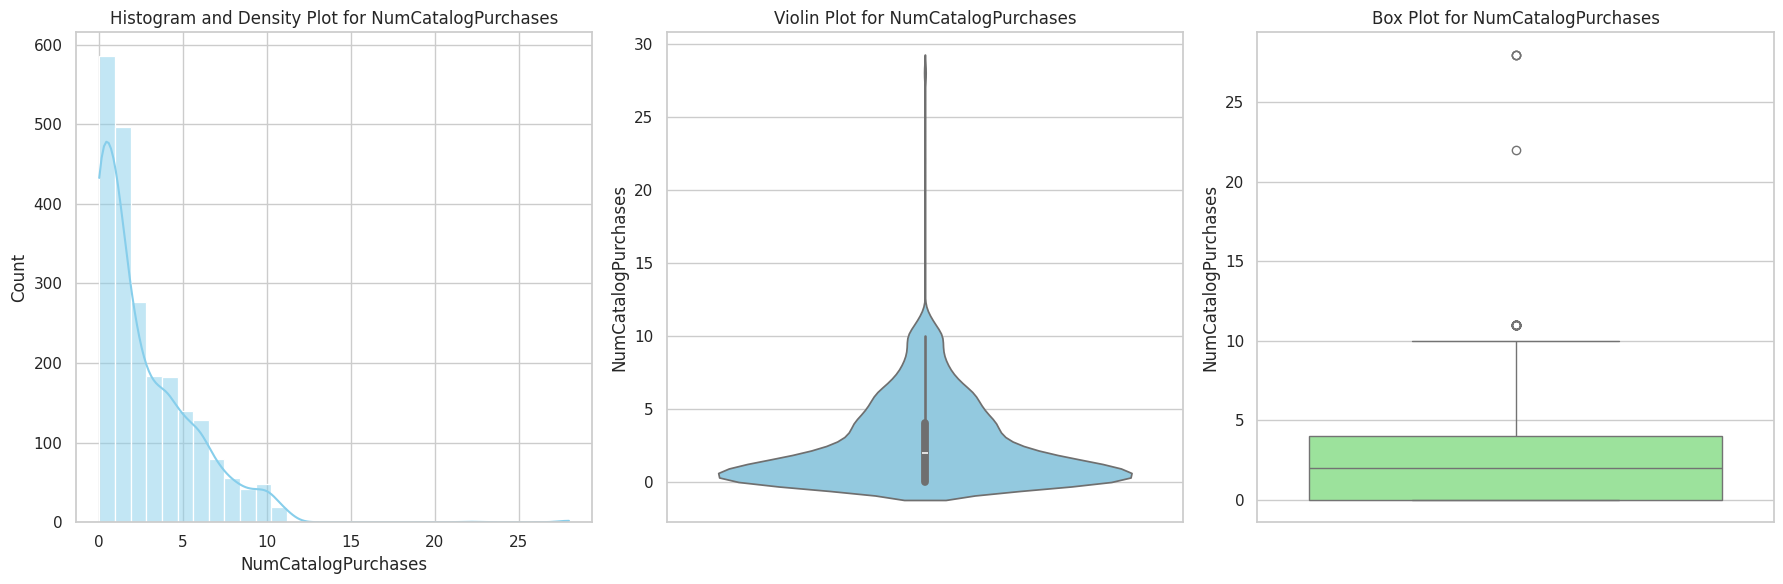

<Figure size 1000x600 with 0 Axes>

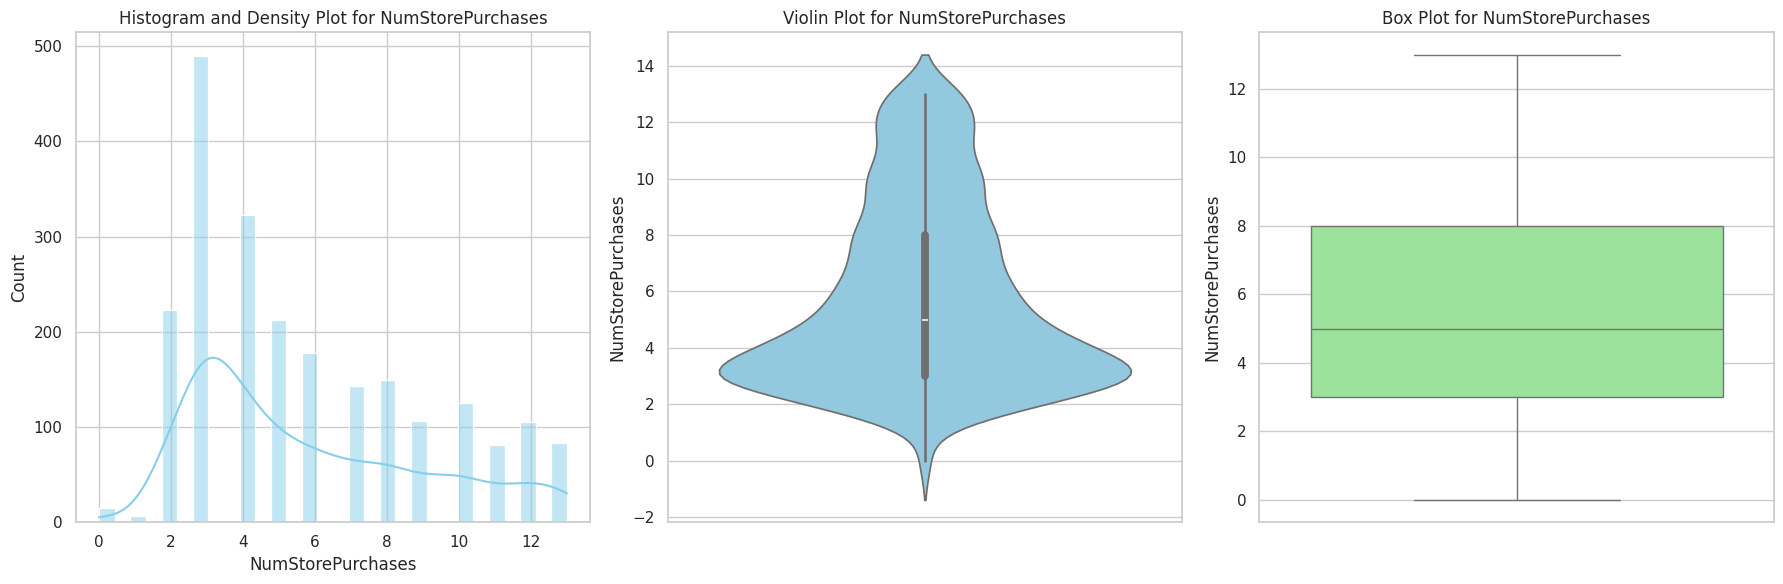

<Figure size 1000x600 with 0 Axes>

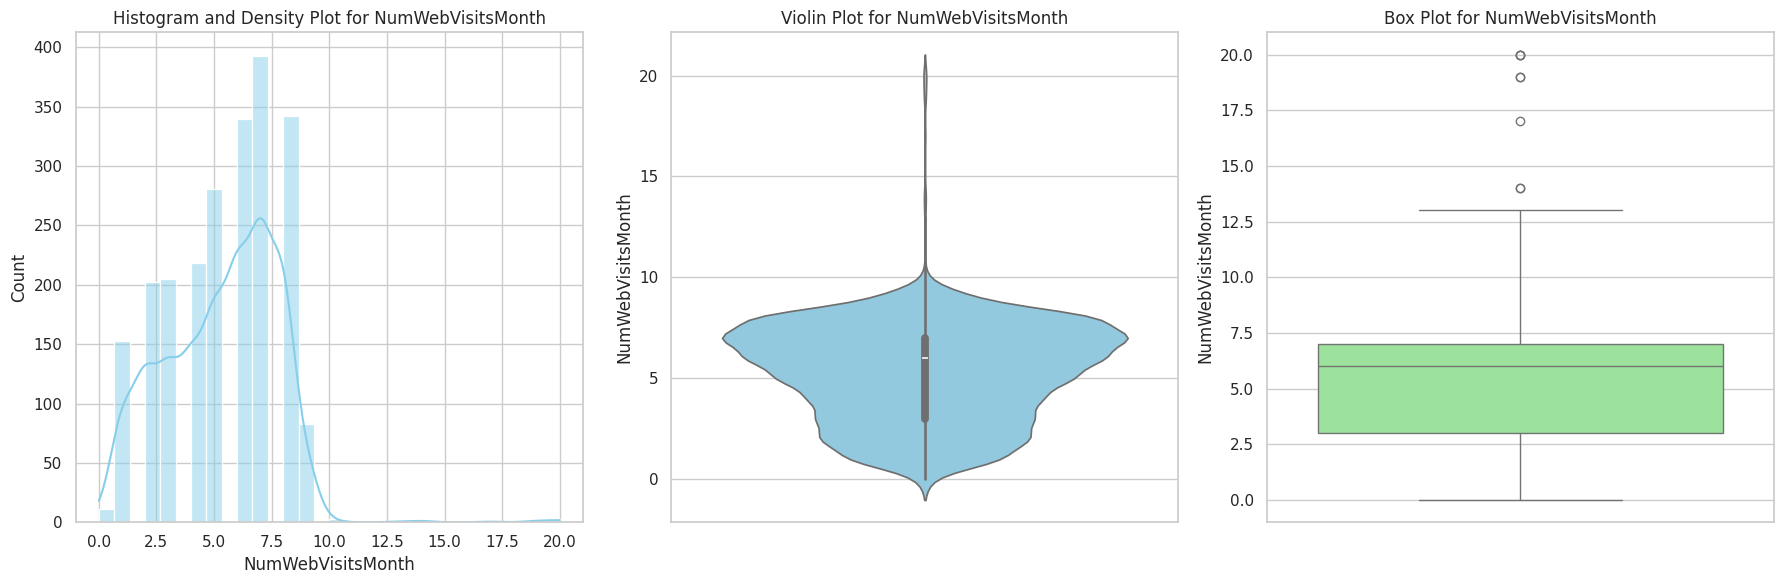

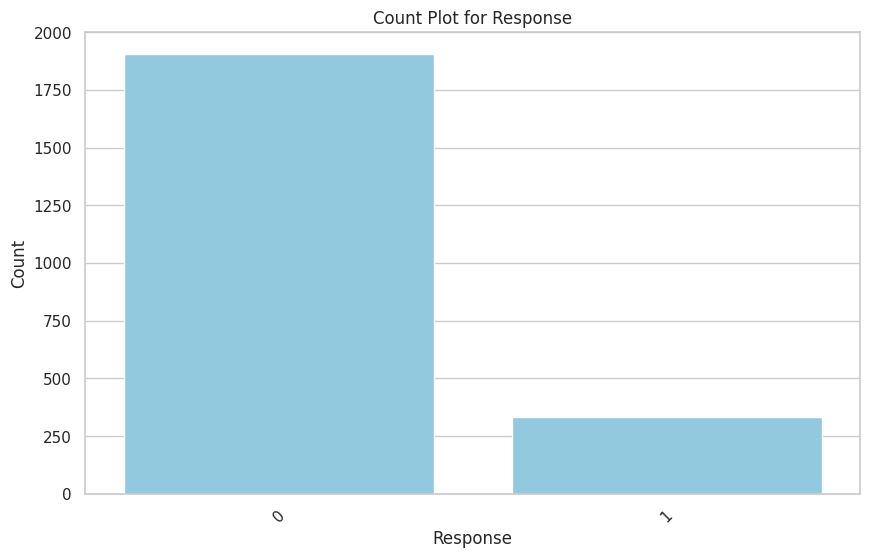

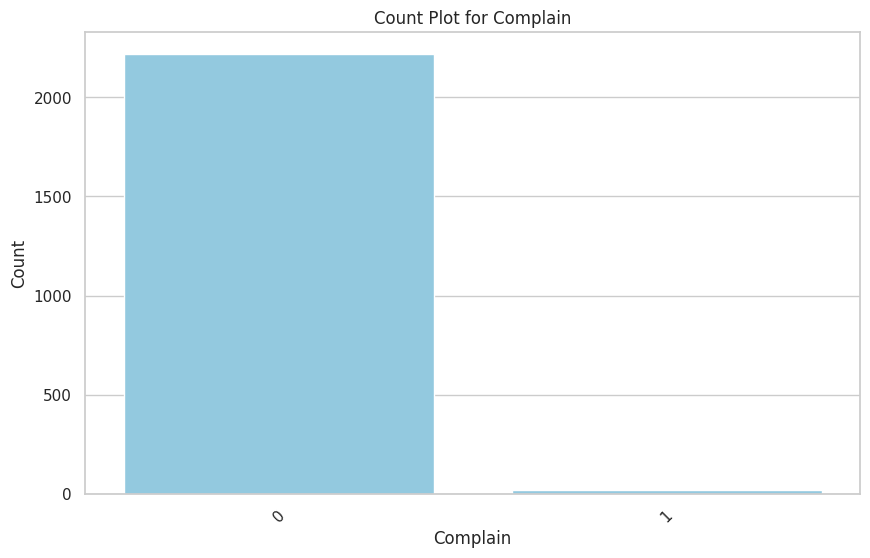

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignora i FutureWarning

# Lista di colonne categoriche o discrete
categorical_or_discrete_cols = ['Response', 'Complain', 'Education',
                                'Marital_Status', 'Kidhome', 'Teenhome', ]

# Generare grafici
for col in df.columns:
    plt.figure(figsize=(10, 6))

    if col in categorical_or_discrete_cols:
        # Istogramma semplice per variabili categoriche o discrete
        sns.countplot(x=df[col], color="skyblue", order=df[col].value_counts().index)
        plt.title(f'Count Plot for {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Ruota le etichette se necessario
    else:
        # Istogramma con KDE, Violin Plot e Box Plot per variabili numeriche
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Histogram and Density Plot for {col}')

        plt.subplot(1, 3, 2)
        sns.violinplot(y=df[col], color="skyblue")
        plt.title(f'Violin Plot for {col}')

        plt.subplot(1, 3, 3)
        sns.boxplot(y=df[col], color="lightgreen")
        plt.title(f'Box Plot for {col}')

        plt.tight_layout()
    plt.show()


Mirando a los graficos, hemos notado como hay una gran cantitad de outliers en algunas variables, lo que las lleva a una fuerte asimetría que luego tendremos que arreglar, por cuanto posible, para que no influya en nuestra analisis.

## Gestión de los valores nulos

Como ya visto en la tabla descriptiva, tenemos valores nulos solo en una columna: la del **Income**.

Para obtener una imputación más fina, hemos decidido imputar el valor promedio **calculandolo por grupos de observaciones**.

Considerando que el Income es una variable sensible al nivel de educación de personas, hemos agrupado por niveles de educación y por cada grupo hemos calculado el income promedio.



In [ ]:
# Calcular el ingreso promedio por nivel educativo
average_income_by_education = df.groupby('Education')['Income'].mean()

# Rellenar los valores NaN en la columna 'Income' utilizando el promedio según el nivel educativo
df['Income'] = df.groupby('Education')['Income'].transform(lambda x: x.fillna(x.mean()))

Comprobamos que ya no hay valores nulos en nuestro dataset






In [ ]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

## **Limpieza de datos**

### Limpieza de datos categoricos




Observando los valores unicos de las columnas categoricas, nos hemos dado cuenta de que en la columna "Marital Status" habían valores incoherentes como por ejemplo **dos etiquetas relacionadas al mismo estado civil**: "Single" y "Alone".

Además había "YOLO" y "absurd", que hemos decidido borrar en cuanto había solo ____ valores (muy pocos sobre el total) y no teníamos indicios sobre el real estado civil de los interesados.




In [ ]:
# Reemplazar los valores "Alone" por "Single" en la columna 'Marital_Status'
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

# Eliminar las filas donde 'Marital_Status' tiene los valores "YOLO" o "Absurd"
df = df[~df['Marital_Status'].isin(['YOLO', 'Absurd'])]


In [ ]:
df.shape

(2236, 21)

### Limpieza de datos de tipo date

Para poder utilizar la información sobre la fecha de primera compra del cliente, hemos utilizado la columna con la fecha (preliminarmente convertida en formato date) para calcular la antigüedad del cliente en unidad de meses (número entero).  

In [ ]:
# Encontramos la fecha más reciente en la columna 'Dt_Customer'
max_date = df['Dt_Customer'].max()

# Calculamos la antigüedad en meses para cada cliente
df['Antiguedad'] = (max_date - df['Dt_Customer']) / pd.Timedelta(days=30)

# Convertimos la antigüedad a un número entero
df['Antiguedad'] = df['Antiguedad'].astype(int)

df = df.drop('Dt_Customer', axis=1)

df.head()

<ipython-input-270-255e46050775>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Antiguedad'] = (max_date - df['Dt_Customer']) / pd.Timedelta(days=30)
<ipython-input-270-255e46050775>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Antiguedad'] = df['Antiguedad'].astype(int)


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1970  Graduation       Divorced  84835.0        0         0        0   
1        1961  Graduation         Single  57091.0        0         0        0   
2        1958  Graduation        Married  67267.0        0         1        0   
3        1967  Graduation       Together  32474.0        1         1        0   
4        1989  Graduation         Single  21474.0        1         0        0   

   MntWines  MntFruits  MntMeatProducts  ...  MntSweetProducts  MntGoldProds  \
0       189        104              379  ...               189           218   
1       464          5               64  ...                 0            37   
2       134         11               59  ...                 2            30   
3        10          0                1  ...                 0             0   
4         6         16               24  ...                 0            34   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                4                    4                  6   
1                  1                7                    3                  7   
2                  1                3                    2                  5   
3                  1                1                    0                  2   
4                  2                3                    1                  2   

   NumWebVisitsMonth  Response  Complain  Antiguedad  
0                  1         1         0           5  
1                  5         1         0           5  
2                  2         0         0           6  
3                  7         0         0           1  
4                  7         1         0           4  

[5 rows x 21 columns]

In [ ]:
df['Age'] = 2025 - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

## Gestión de outliers



De momento che las distribuciones de las variables parecen muy asimetricas con valores extremos, hemos decidido gestionar los valores nulos con el metodo IQR.

Este metodo trabaja con el rango intercuartílico, quitando los valores que se encuentran por debajo del límite inferior o por encima del límite superior, calculados como:




Límite inferior:
Q1 − 1.5 × IQR

Límite superior:
Q3 + 1.5 × IQR

Con IQR = Q3 - Q1

Donde con Q se entiende un cuartil (un valor que divide los datos en cuatro partes iguales, ordenados de menor a mayor).

Q1: Primer cuartil (25% de los datos están por debajo de este valor).

Q3: Tercer cuartil (75% de los datos están por debajo de este valor).


In [ ]:
# Crear una función que quita los outliers, aplicándola directamente a las columnas indicadas
def remove_outliers_iqr(df, columns):

    for col in columns:
        Q1 = df[col].quantile(0.25)  # Primer cuartil
        Q3 = df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico

        # Definir límites inferior y superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar las filas dentro de los límites
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Devolver el DataFrame limpio
    return df

# columnas a las que queremos quitar los outliers
columns_to_clean = [
    'Age', 'Recency', 'MntWines',
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumWebVisitsMonth', 'Income', 'Age']

# Aplicamos la función a esas columnas y guardamos el resultados en una nueva variable
df_no_outliers = remove_outliers_iqr(df, columns_to_clean)


Evaluamos las distribuciones de las variables que hemos limpiado desde los outliers, después del proceso.

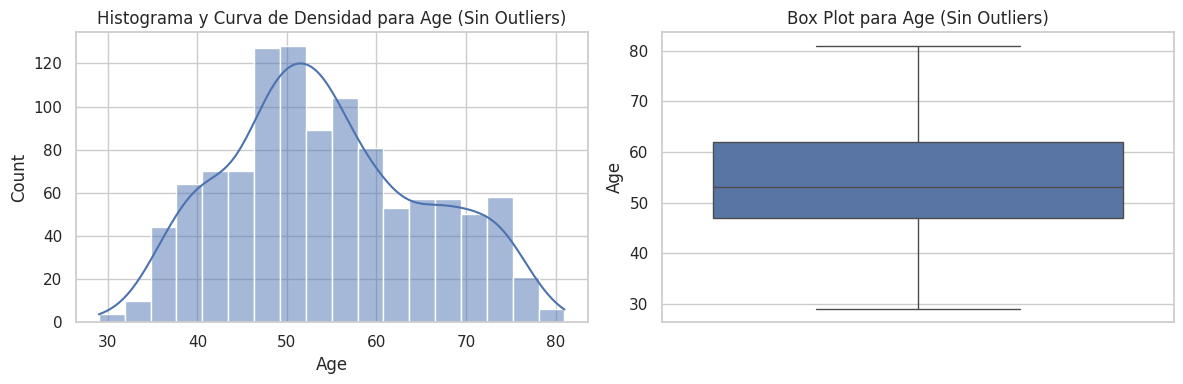

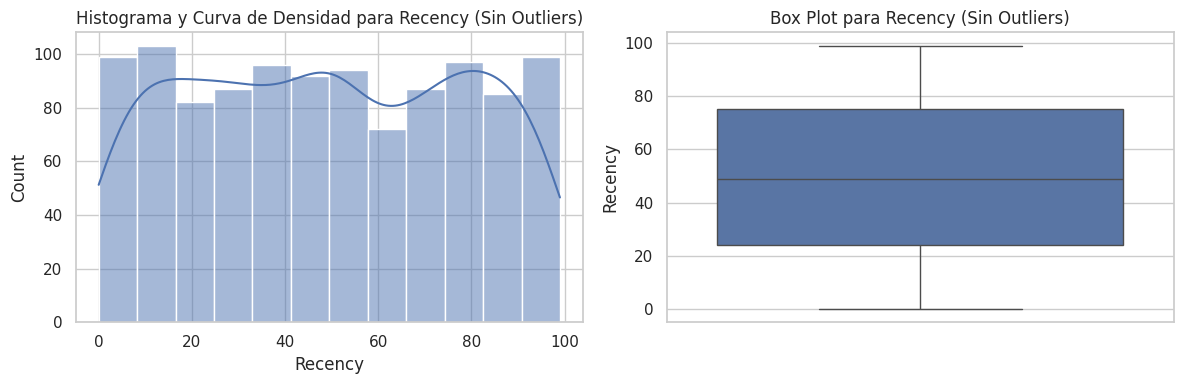

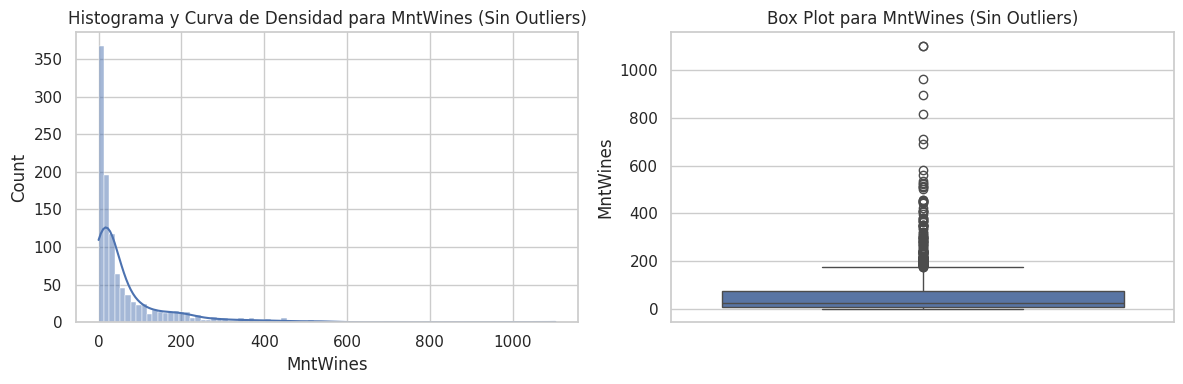

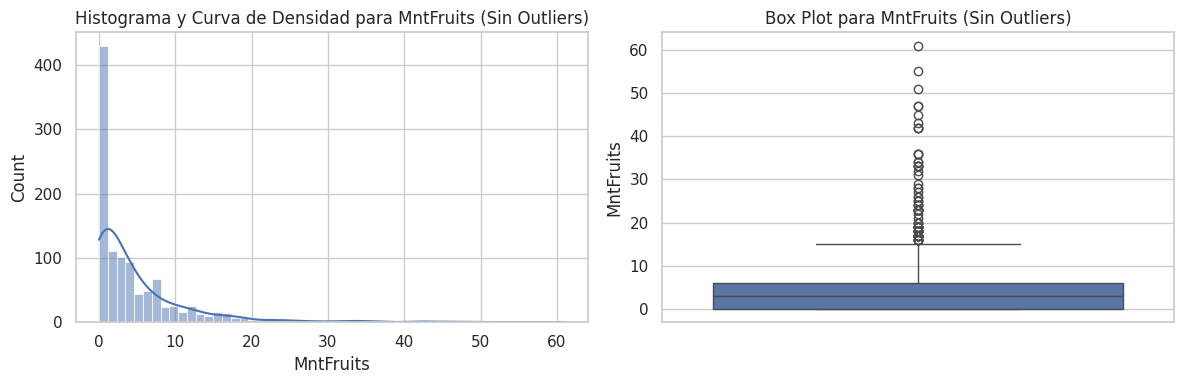

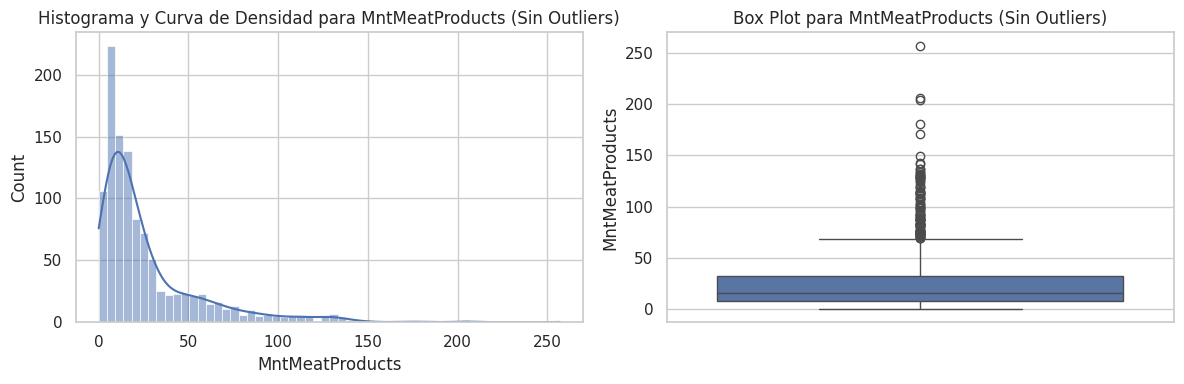

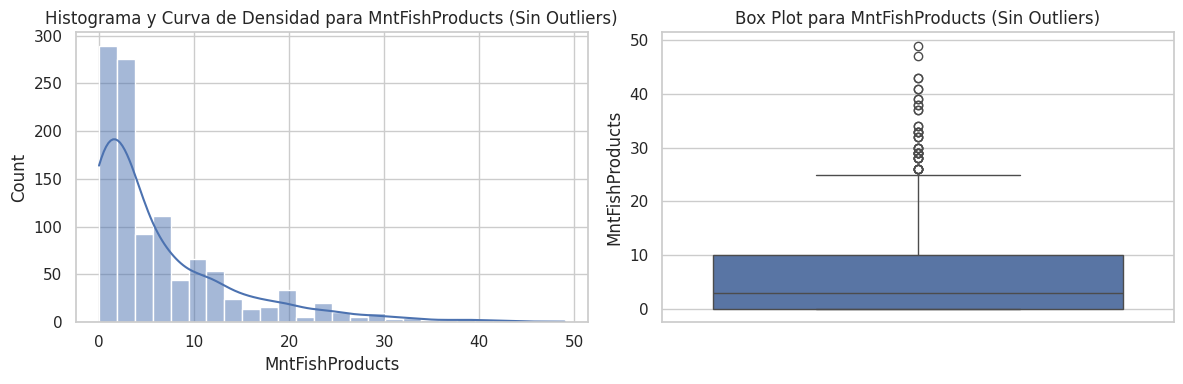

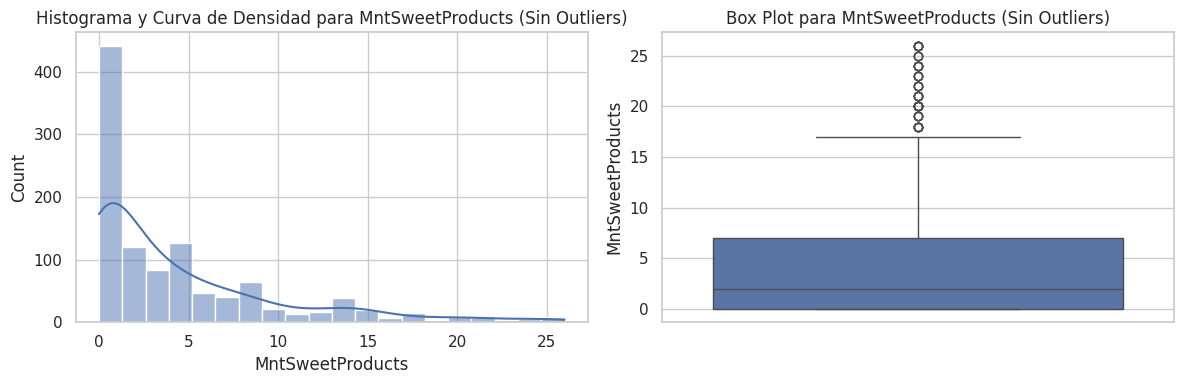

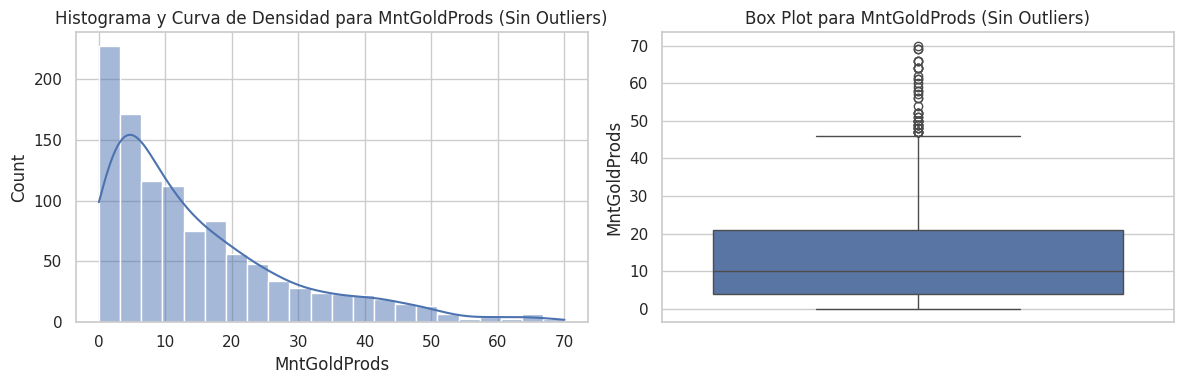

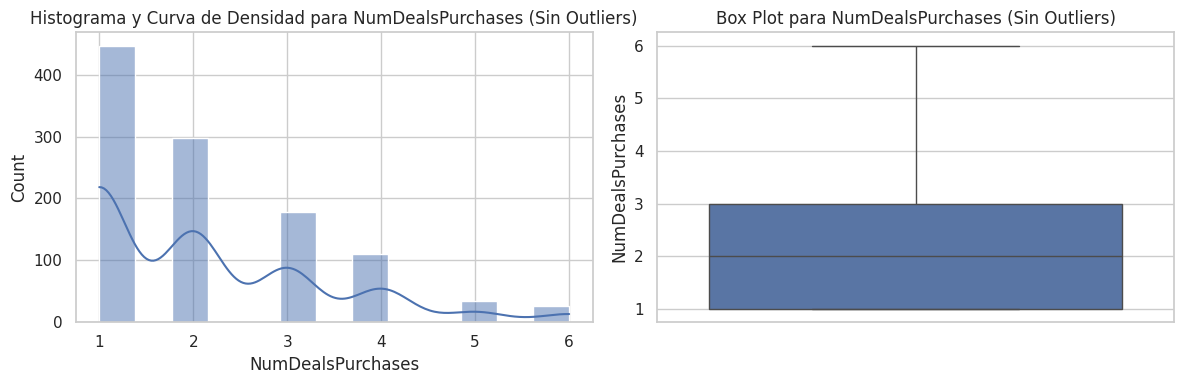

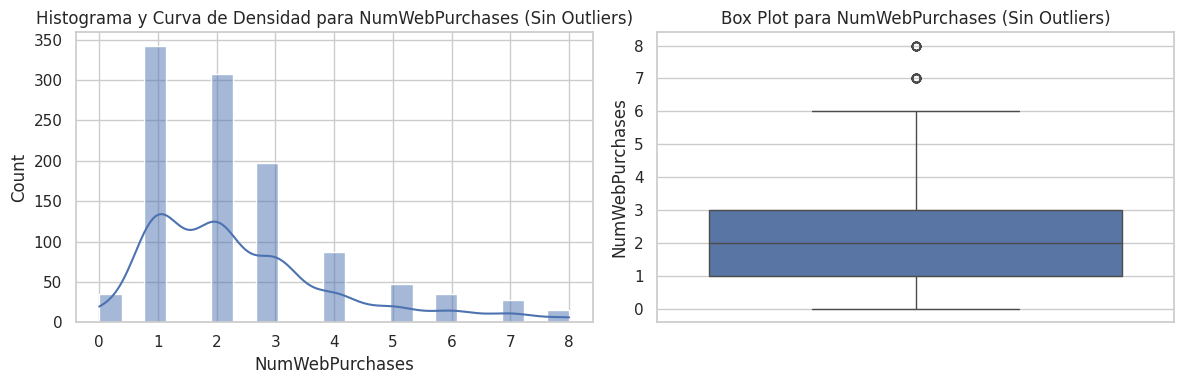

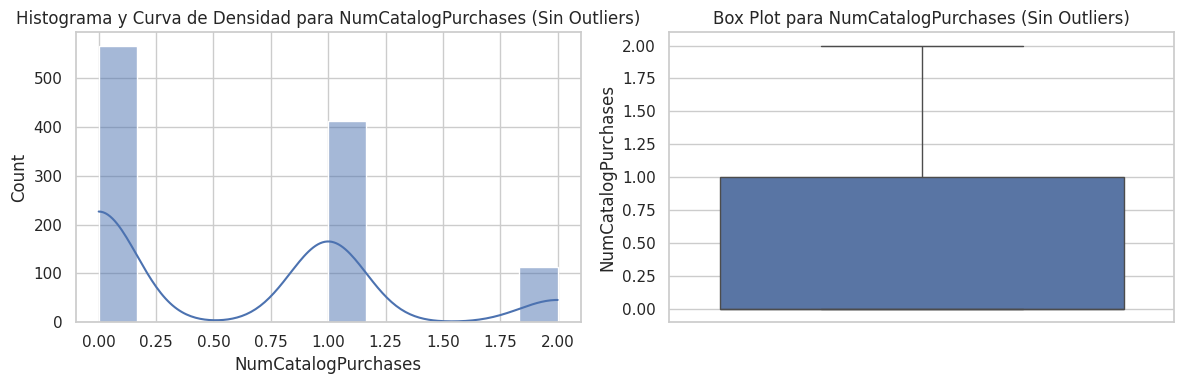

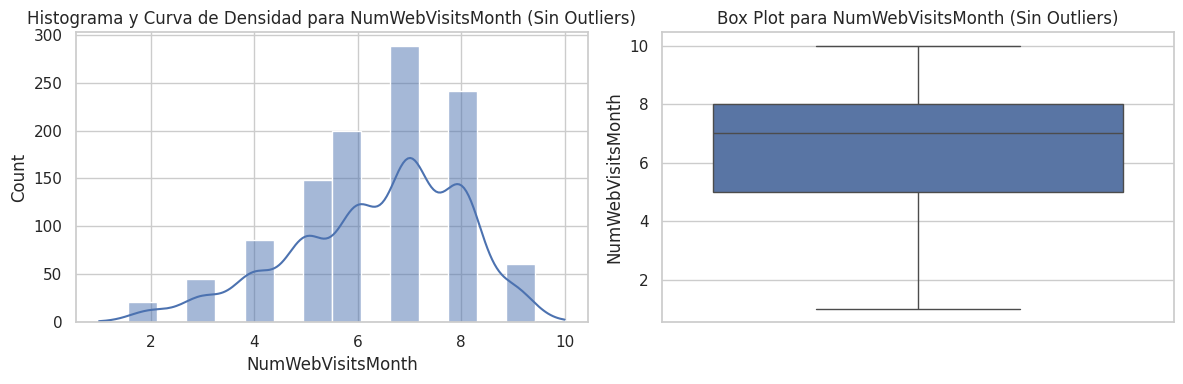

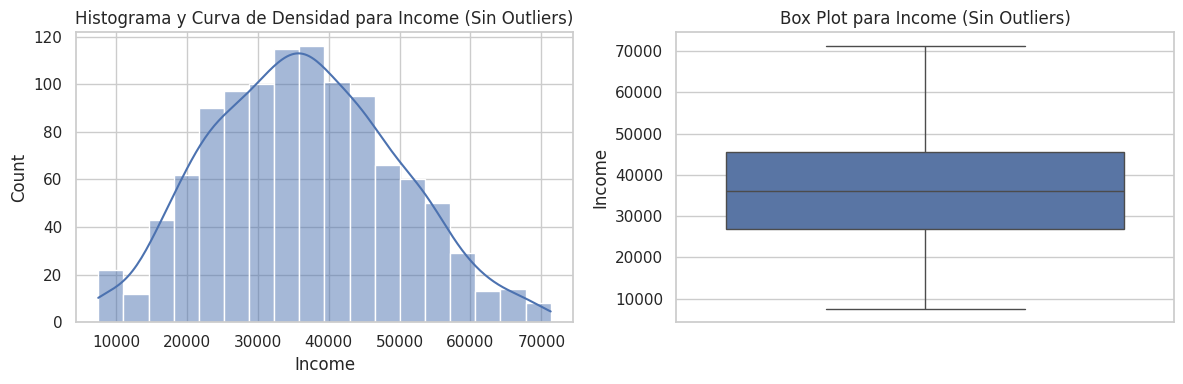

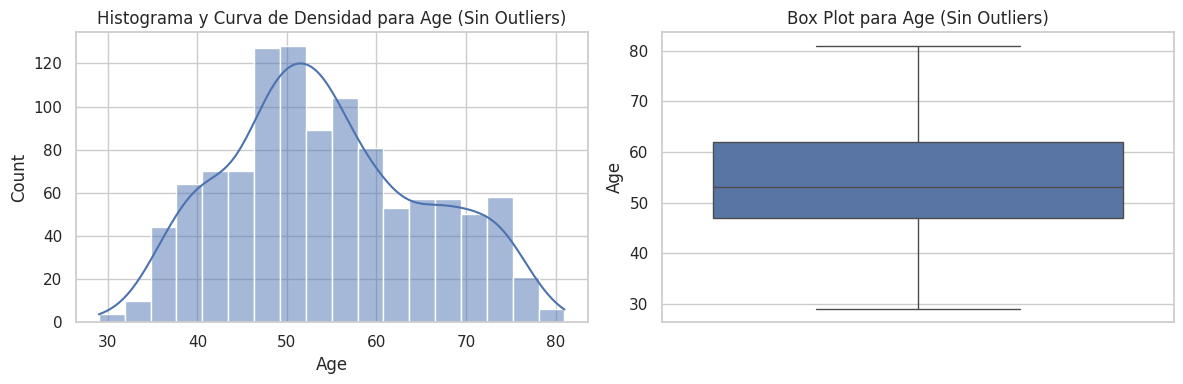

In [ ]:
# iterar sobre las columnas numéricas en el df sin outliers
for col in df_no_outliers[columns_to_clean]:
  plt.figure(figsize=(12, 4)) #tamaño de la figura

  # generamos histograma con curva de densidad
  plt.subplot(1, 2, 1)
  sns.histplot(df_no_outliers[col], kde=True)
  plt.title(f'Histograma y Curva de Densidad para {col} (Sin Outliers)')

  # generamos gráfico de caja
  plt.subplot(1, 2, 2)
  sns.boxplot(y=df_no_outliers[col])
  plt.title(f'Box Plot para {col} (Sin Outliers)')

  # Ajustar el diseño de los subgráficos
  plt.tight_layout()
  plt.show()


Como se puede observar, con el método aplicado, hemos eliminado todos los outliers y las distribuciones de estas columnas son mucho más normales.

In [ ]:
df_no_outliers.shape

(1093, 21)

In [ ]:
df_balanced = df_no_outliers.copy()

## Estudio de correlación:


### Correlación entre variables numericas

Medir correlaciones es crucial para entender cómo las variables se relacionan entre sí.

Esto permite identificar relaciones lineales o no lineales, ayudando a seleccionar variables relevantes y a reducir redundancias (como en el caso de variables altamente correlacionadas).

Además, las correlaciones son fundamentales para evitar problemas como la multicolinealidad en que puede afectar la precisión de los resultados de momento que las variables dependientes tienen que estar independientes entre si mismas.


####Correlación de Pearson

La correlación de Pearson mide la **relación lineal** entre dos variables, evaluando cómo varían juntas de forma proporcional.

Es sensible a los outliers y requiere que las variables sigan una distribución normal.

Su valor varía entre -1 y 1, siendo 0 indicativo de ausencia de correlación.


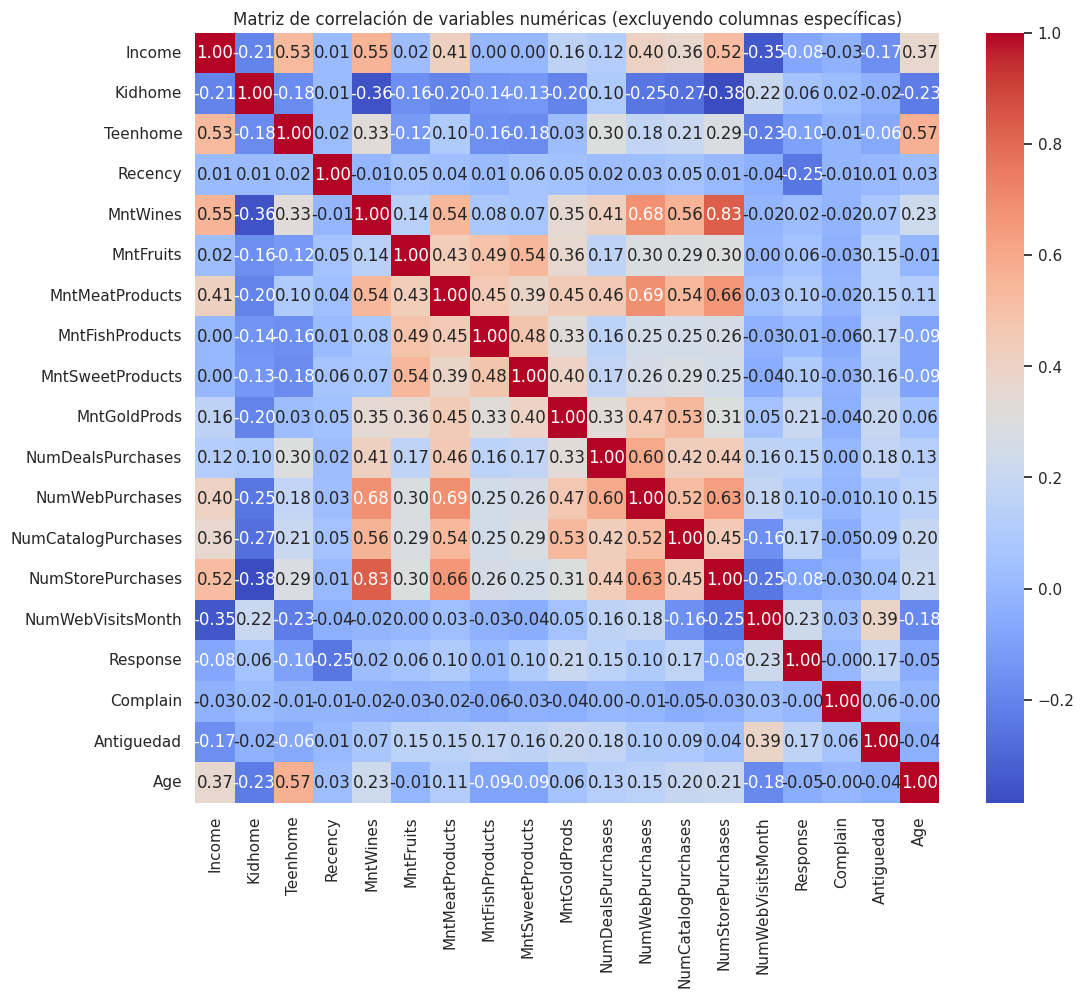

In [ ]:
# Excluir columnas específicas del análisis de correlación
columns_to_exclude = ['marital_status', 'education']  # Columnas que no se incluirán en el análisis
numerical_cols = df_no_outliers.select_dtypes(include=np.number).columns  # Seleccionar solo columnas numéricas
numerical_cols = [col for col in numerical_cols if col not in columns_to_exclude]  # Filtrar columnas excluyendo las especificadas

# Calcular la matriz de correlación
correlation_matrix = df_no_outliers[numerical_cols].corr()  # Matriz de correlación para las columnas numéricas seleccionadas

# Graficar el mapa de calor
plt.figure(figsize=(12, 10))  # Configurar el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Graficar la matriz con anotaciones y un mapa de colores
plt.title('Matriz de correlación de variables numéricas (excluyendo columnas específicas)')  # Agregar título al gráfico
plt.show()  # Mostrar el gráfico


####Correlación de Spearman

La correlación de Spearman, diferentemente de Pearson, evalúa la **relación monótona** (creciente o decreciente), entre dos variables basándose en sus rangos en lugar de sus valores reales.

Esto significa que no considera directamente los valores numéricos de las variables, sino el **orden relativo de esos valores**.

Es más robusta frente a outliers y no requiere que los datos sean normales ni que la relación sea lineal. Su valor oscila entre -1 y 1 con 0 indicativo de ausencia de correlación.

Es ideal para relaciones no lineales y datos con distribuciones atípicas.

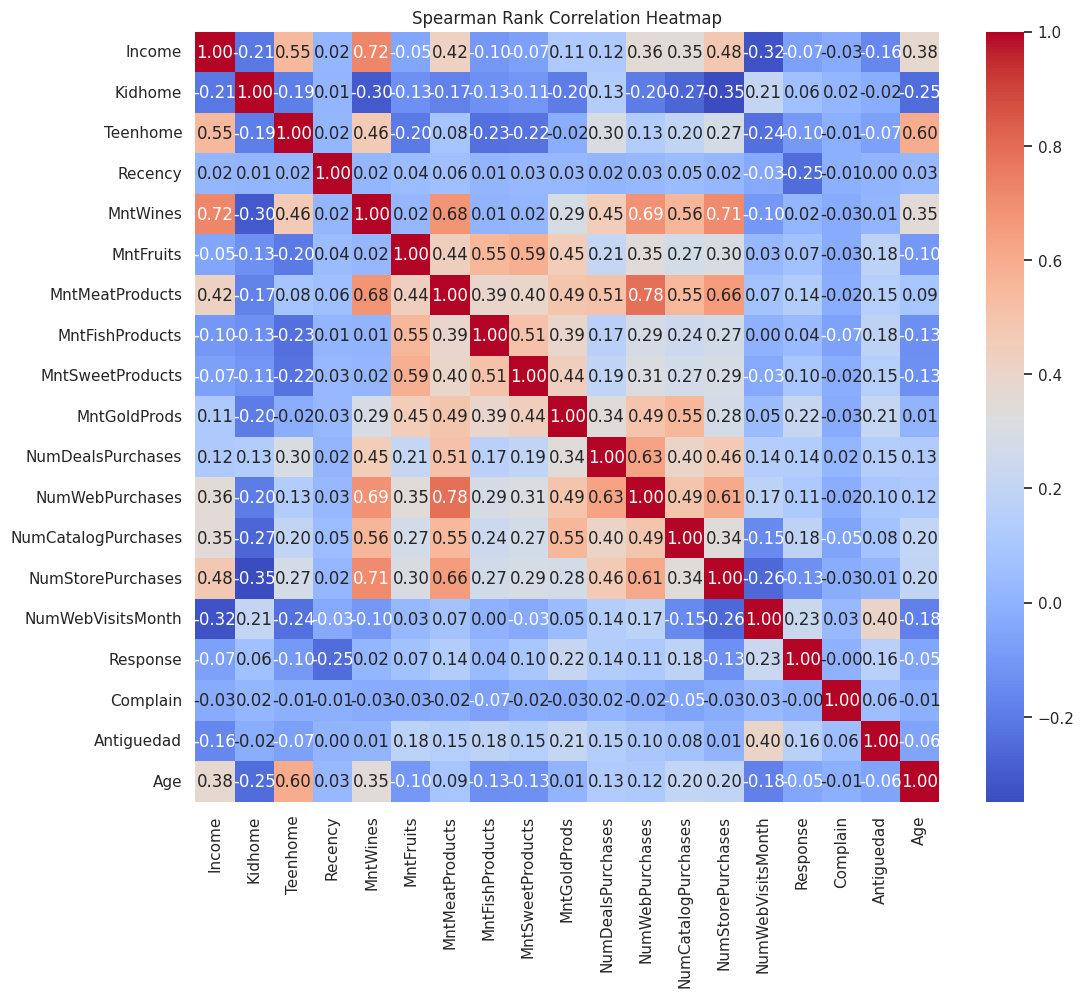

In [ ]:
# Calculate Spearman rank correlation
spearman_corr = df_no_outliers[numerical_cols].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

### Chi-quadrado

El test de chi cuadrado es una prueba estadistica que se utiliza para evaluar si existen asociaciónes entre variables categóricas de un dataset.

Se basa en dos hipótesis:

- Hipótesis nula: no hay relación, las variables son independientes.
- Hipótesis alternativa: hay relaciónes entre las variables.

Esta prueba evalúa si las diferencias entre las frecuencias observadas y las esperadas son lo suficientemente grandes como para rechazar la hipótesis nula y concluir que las variables están asociadas.

El test de chi cuadrado se aplica solo a variables categóricas.

Si el dataset tiene una mezcla de variables categóricas y numéricas, hay que transformar las numéricas en categóricas, dividiendolas en intervalos (por ejemplo bajo-intermedio-alto).

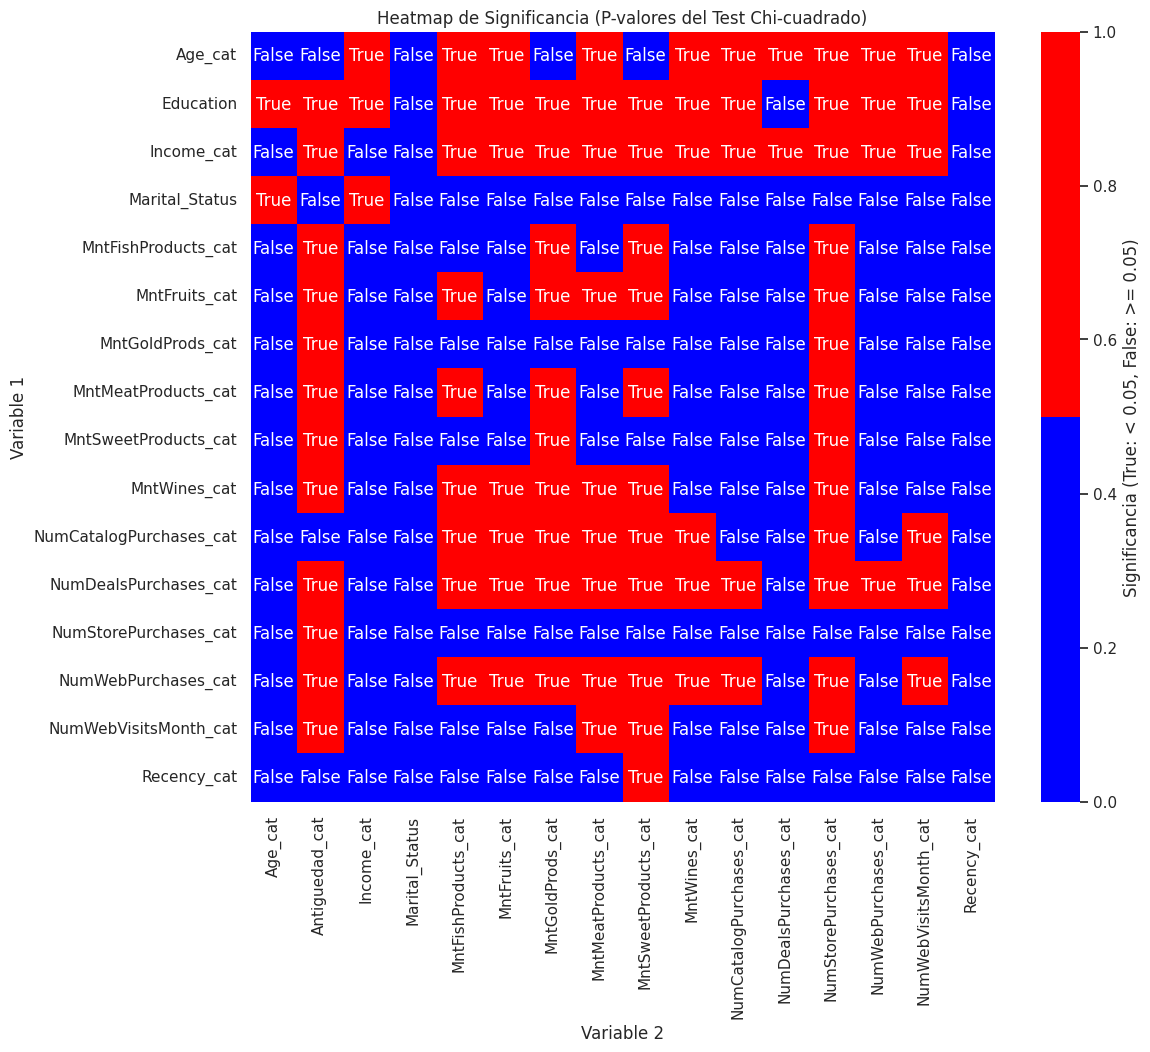

In [ ]:
from scipy.stats import chi2_contingency

# Crear una copia del dataset original para no modificarlo
df_copy = df_no_outliers.copy()

# Definir las columnas numéricas a categorizar
numerical_cols_to_categorize = ['Age', 'Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                'NumWebVisitsMonth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumStorePurchases',
                                'NumCatalogPurchases', 'NumWebVisitsMonth', 'Antiguedad']

def categorize_numerical_column(df, column_name):
    """
    Categoriza una columna numérica en tres grupos: low, medium, high.
    Los límites se definen usando los terciles (33% y 66%).
    """
    # Calcular los terciles
    low_threshold = df[column_name].quantile(0.33)
    high_threshold = df[column_name].quantile(0.66)

    # Crear una nueva columna categórica basada en los límites
    df[column_name + '_cat'] = pd.cut(df[column_name],
                                      bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                                      labels=['low', 'medium', 'high'])
    return df

# Categorizar las columnas numéricas en el dataset copiado
for col in numerical_cols_to_categorize:
    df_copy = categorize_numerical_column(df_copy, col)

# Seleccionar solo las columnas categóricas para el análisis
categorical_columns = df_copy.select_dtypes(include=['object', 'category']).columns

# Crear un DataFrame para almacenar los resultados del test de chi-cuadrado
chi2_results = []

# Aplicar el test de chi-cuadrado entre todas las combinaciones de columnas categóricas
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        col1 = categorical_columns[i]
        col2 = categorical_columns[j]

        # Crear tabla de contingencia
        contingency_table = pd.crosstab(df_copy[col1], df_copy[col2])

        # Calcular el test de chi-cuadrado
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Guardar los resultados en una lista
        chi2_results.append({
            'Variable 1': col1,
            'Variable 2': col2,
            'P-valor': p
        })

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(chi2_results)

# Crear una matriz booleana (True si p-valor < 0.05, False en caso contrario)
heatmap_data_boolean = results_df.pivot(index="Variable 1", columns="Variable 2", values="P-valor").applymap(lambda x: x < 0.05 if not pd.isnull(x) else False)

# Generar el heatmap para visualizar los p-valores significativos como True/False
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data_boolean,  # Matriz booleana para significancia
    annot=heatmap_data_boolean,  # Mostrar True/False en las celdas
    cmap=sns.color_palette(["blue", "red"]),  # Azul: No significativo, Rojo: Significativo
    fmt="",  # Sin formato adicional
    cbar_kws={'label': 'Significancia (True: < 0.05, False: >= 0.05)'}
)

# Añadir títulos y mostrar el gráfico
plt.title("Heatmap de Significancia (P-valores del Test Chi-cuadrado)")
plt.xlabel("Variable 2")
plt.ylabel("Variable 1")
plt.show()


Las variables numericas han sido divididas en tres categorías:
- low
- medium
-high

utilizando los terciles (quantiles 33% y 66%).

**P-value:**

- Si el p-value calculado por este test es menor que 0.05, se rechaza la hipótesis nula y se concluye que existe suficiente evidencia para afirmar que las variables están relacionadas.
- Si el p-value es mayor que 0.05, no se rechaza la hipótesis nula, lo que indica que no hay suficiente evidencia para concluir que las variables están relacionadas.

## Enconding de variables categoricas

### Label Encoding


El Label Encoding transforma las categorías de una variable en valores numéricos enteros.

Cada categoría única se reemplaza por un número, respetando su orden lógico o jerárquico (por ejemplo, "Bajo" → 0, "Medio" → 1, "Alto" → 2).

Esta técnica es ideal para atributos con un orden intrínseco, ya que, de lo contrario, el modelo podría interpretar relaciones numéricas inexistentes entre las categorías.

In [ ]:
# prompt: enseñame los valores únicos de education

print(df_balanced['Education'].unique())

['Graduation' 'Master' 'PhD' '2n Cycle' 'Basic']


In [ ]:
# Definir el orden jerárquico de los niveles educativos (de menor a mayor)
education_order = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}

# Reemplazar las categorías en 'Education' con valores numéricos según la jerarquía
df_balanced['Education'] = df_balanced['Education'].map(education_order)



###One Hot Encoding

El One-Hot Encoding crea una columna binaria (0/1) para cada categoría única de una variable.

Se genera una nueva columna por cada valor unico, indicando la presencia (1) o ausencia (0) del mismo para la observación.

Es ideal para variables categóricas sin un orden lógico, pero puede aumentar significativamente el número de columnas en datasets con muchas categorías.

In [ ]:
# Crear variables dummy para la columna 'Marital_Status' con un prefijo
marital_status_dummies = pd.get_dummies(df_balanced['Marital_Status'], prefix='Marital_Status')

# Concatenar las nuevas columnas dummy al DataFrame original
df_balanced = pd.concat([df_balanced, marital_status_dummies], axis=1)

# Eliminar la columna original 'Marital_Status' del DataFrame
df_balanced = df_balanced.drop('Marital_Status', axis=1)

print(df_balanced.head())

    Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
2           2  67267.0        0         1        0       134         11   
3           2  32474.0        1         1        0        10          0   
4           2  21474.0        1         0        0         6         16   
7           2  44931.0        0         1        0        78          0   
11          3  62499.0        1         0        0       140          4   

    MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
2                59               15                 2  ...   
3                 1                0                 0  ...   
4                24               11                 0  ...   
7                11                0                 0  ...   
11               61                0                13  ...   

    NumWebVisitsMonth  Response  Complain  Antiguedad  Age  \
2                   2         0         0           6   67   
3                   7         0         0     

##Oversampling con SMOTENC

In [ ]:
# Separamos las características (features) y la variable objetivo (target)
X = df_balanced.drop(columns=['Response'])  # Reemplaza 'Target' con el nombre de tu columna objetivo
y = df_balanced['Response']

# Identificamos las columnas categóricas
categorical_features = []

# Agregamos el índice de la columna 'Education', que está codificada con Label Encoding
categorical_features.append(X.columns.get_loc('Education'))

# Agregamos los índices de las columnas One-Hot Encoded relacionadas con el estado civil
categorical_features += [
    X.columns.get_loc('Marital_Status_Married'),
    X.columns.get_loc('Marital_Status_Single'),
    X.columns.get_loc('Marital_Status_Widow'),
    X.columns.get_loc('Marital_Status_Together')
]

# Configuramos SMOTENC para trabajar con un conjunto de datos mixto (categórico y numérico)
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Aplicamos SMOTENC para balancear el conjunto de datos
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Convertimos los datos balanceados a un DataFrame para su visualización
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='Target')

# Imprimimos el resultado
print("Dimensiones del conjunto de datos original:", X.shape, y.shape)
print("Dimensiones del conjunto de datos balanceado:", X_resampled.shape, y_resampled.shape)
print("Distribución de las clases después de SMOTENC:")
print(y_resampled.value_counts())

Dimensiones del conjunto de datos original: (1093, 24) (1093,)
Dimensiones del conjunto de datos balanceado: (1986, 24) (1986,)
Distribución de las clases después de SMOTENC:
Target
0    993
1    993
Name: count, dtype: int64


In [ ]:

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Response'] = y_resampled

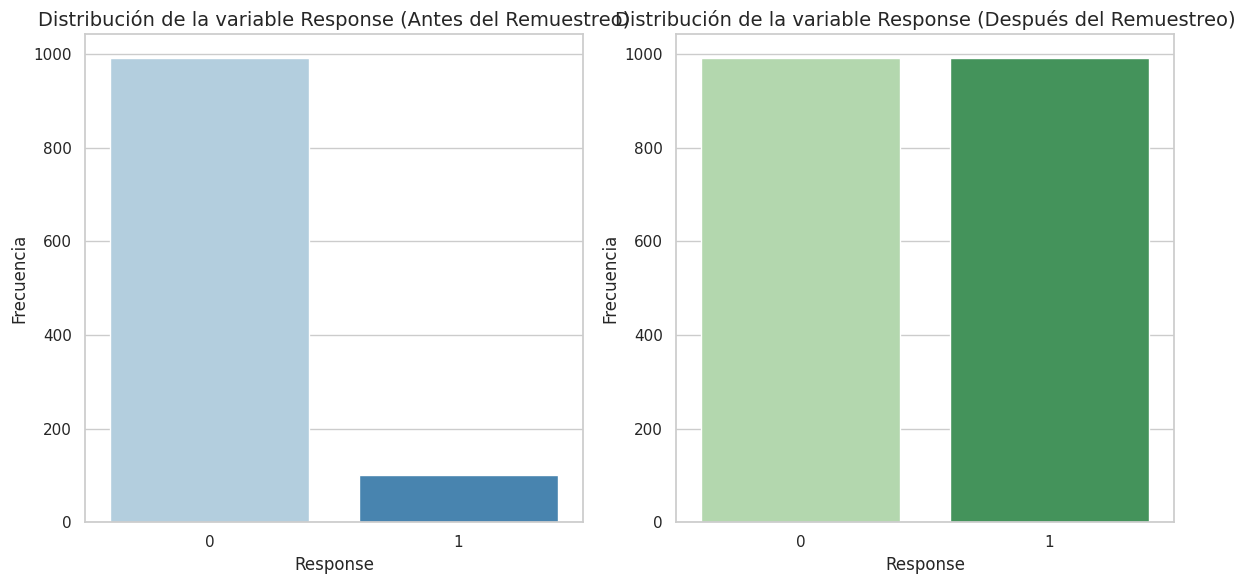

In [ ]:

plt.figure(figsize=(12, 6))

# Antes del remuestreo
plt.subplot(1, 2, 1)
sns.countplot(data=df_no_outliers, x='Response', palette="Blues")
plt.title('Distribución de la variable Response (Antes del Remuestreo)', fontsize=14)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Después del remuestreo
plt.subplot(1, 2, 2)
sns.countplot(data=df_balanced, x='Response', palette="Greens")
plt.title('Distribución de la variable Response (Después del Remuestreo)', fontsize=14)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout()
plt.show()


## Reducción de dimensionalidad con Random Forest

De la analisis de correlación hemos notado que hay muchas variables relacionadas entre ellas.

Para evitar problemas de multicollinealidad, hemos decidido utilizar un modelo llamado **Random Forest** que también tiene aplicación en identificar cuales son las variables que explican más el dataset y cuales no son relevantes.

Para realizar esta analisis de relevancia, este modelo construye un conjunto de árboles independientes.

Cada árbol del random-forest se entrena con un subconjunto aleatorio de atributos (**feature bagging**), reduciendo la probabilidad de que variables altamente correlacionadas dominen el modelo.

Una vez entrenado el modelo, podemos acceder a los valores de importancia de las features gracias al metodo feature_importances que nos da información sobre la relevancia de cada columna en la reducción de la impuridad en los nodos de los árboles.

In [ ]:
from sklearn.metrics import accuracy_score

# Dataset de ejemplo (X: características, y: variable objetivo)
X = df_balanced.drop('Response', axis=1)
y = df_balanced['Response']

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Calcular la importancia de las características
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Calcular la suma acumulada de las importancias
feature_importances['Cumulative Importance'] = feature_importances['Importance'].cumsum()

# Mostrar el DataFrame con las características ordenadas por importancia
print("Características ordenadas por importancia:")
print(feature_importances)



Características ordenadas por importancia:
                    Feature  Importance  Cumulative Importance
4                   Recency    0.163374               0.163374
10             MntGoldProds    0.112440               0.275814
7           MntMeatProducts    0.089611               0.365425
14        NumStorePurchases    0.080724               0.446149
15        NumWebVisitsMonth    0.059897               0.506045
17               Antiguedad    0.057421               0.563467
1                    Income    0.054439               0.617905
0                 Education    0.043102               0.661007
3                  Teenhome    0.039606               0.700613
5                  MntWines    0.037635               0.738248
18                      Age    0.037043               0.775291
8           MntFishProducts    0.029712               0.805003
9          MntSweetProducts    0.029171               0.834173
6                 MntFruits    0.028739               0.862912
13      NumC

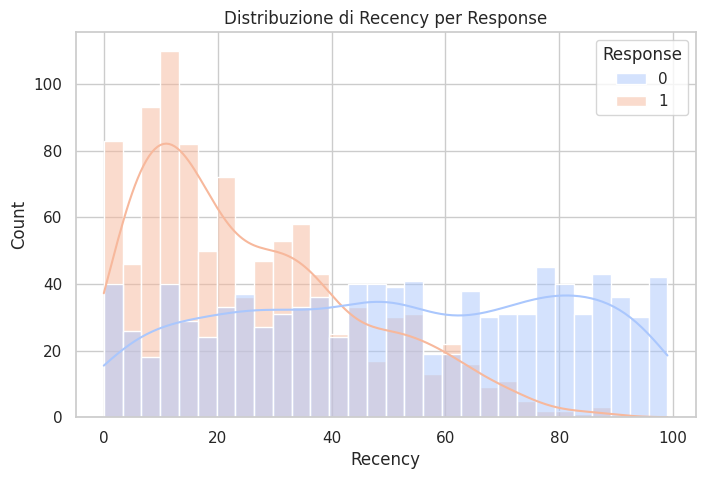

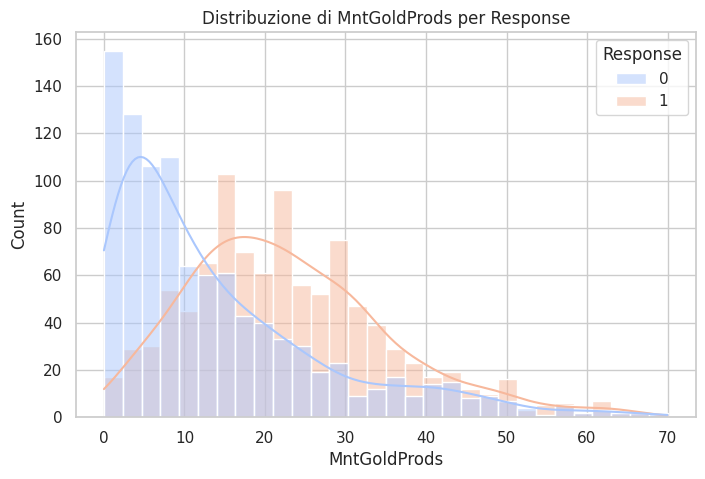

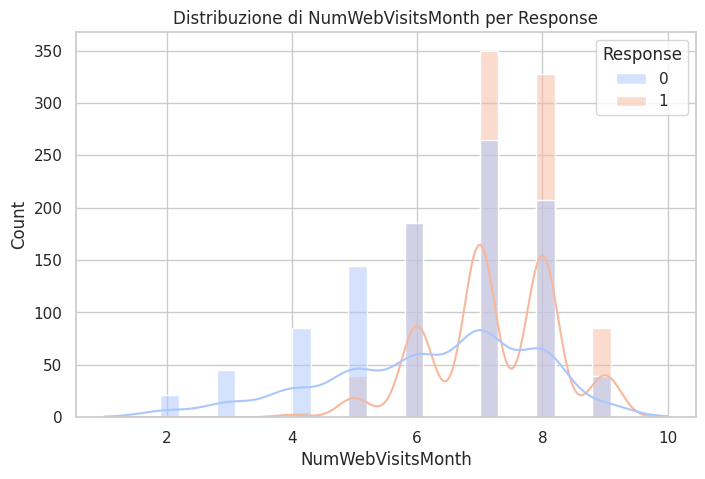

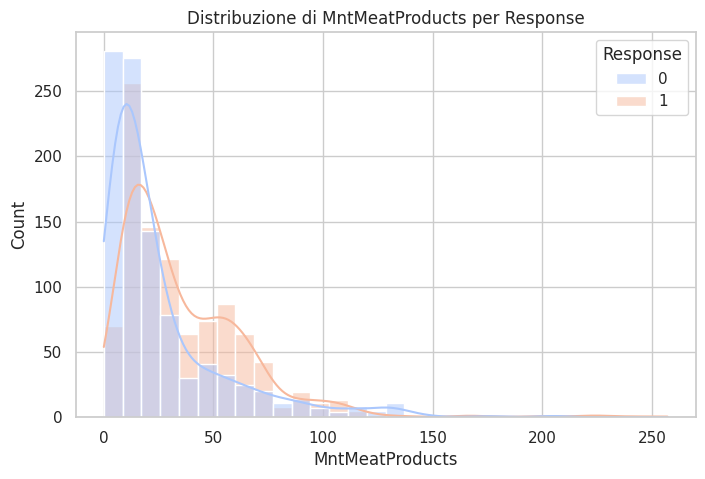

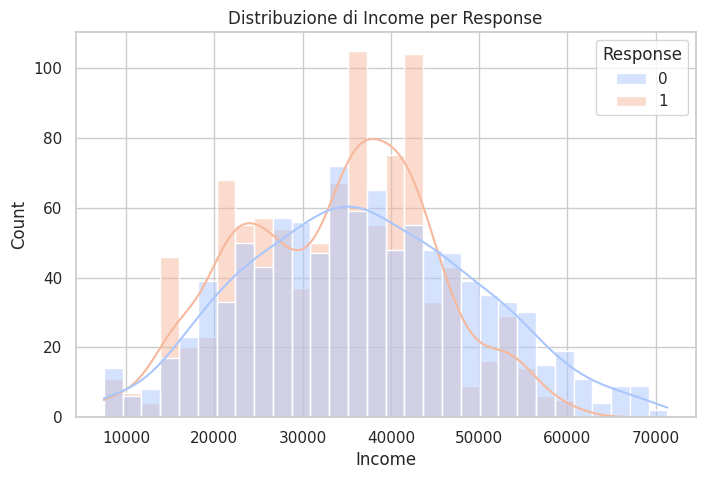

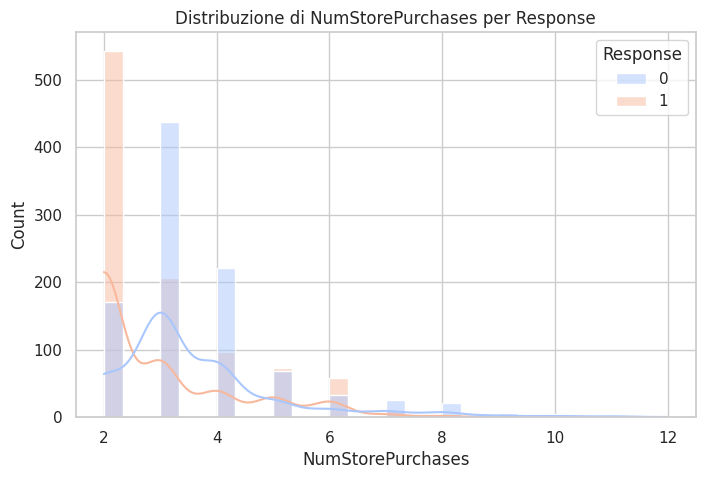

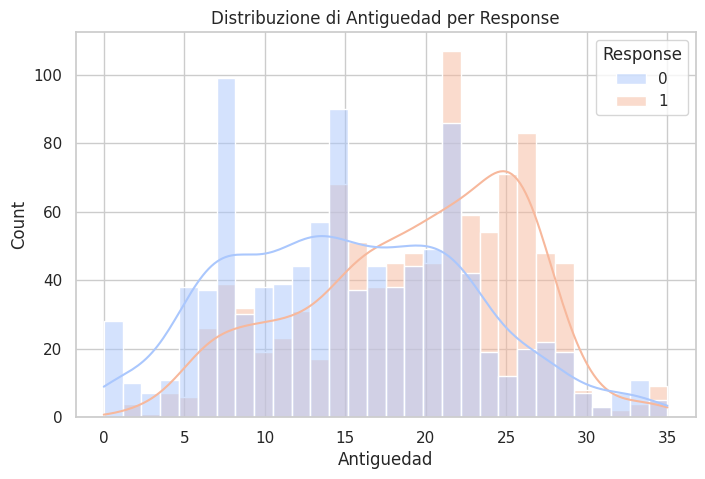

In [ ]:
# Variabili principali da analizzare
important_features = ['Recency', 'MntGoldProds', 'NumWebVisitsMonth', 'MntMeatProducts', 'Income', 'NumStorePurchases', 'Antiguedad']

# Confronta la distribuzione delle variabili per ogni valore di Response
for feature in important_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_balanced, x=feature, hue='Response', kde=True, palette='coolwarm', bins=30)
    plt.title(f'Distribuzione di {feature} per Response')
    plt.show()


## Transformación de BoxCox

Para normalizar los atributos que quedan con una forma asimetrica, aplicamos la transformación de BoxCox.

Las columnas interesadas son:

MntWines, MntFruits, MntMeatProd, MntFish, MntSweetProducts, MntGold

In [ ]:
# columnas a las que se aplicará la transformación Box-Cox
columns_to_transform = ['MntWines', 'MntMeatProducts', 'MntGoldProds']

# aplicamos la transformación Box-Cox a las columnas especificadas
for col in columns_to_transform:  # Iteramos sobre cada columna en la lista
    # añadimos una pequeña constante para manejar valores iguales a cero o negativos
    # necesario porque Box-Cox funciona solo con valores positivos
    df_balanced[col] = df_balanced[col] + 1e-6

    # Aplicamos la transformación Box-Cox a la columna
    # boxcox devuelve dos valores: los datos transformados y el valor de lambda
    df_balanced[col], lambda_val = boxcox(df_balanced[col])

    # Imprimir el valor de lambda para la columna transformada
    # Lambda es un parámetro que ajusta la naturaleza de la transformación
    print(f"Valor de lambda para {col}: {lambda_val}")


Valor de lambda para MntWines: 0.1669487219435155
Valor de lambda para MntMeatProducts: 0.15684387795584645
Valor de lambda para MntGoldProds: 0.3943296802803483


El valor de lambda es el parámetro calculado al aplicar la transformación Box-Cox, y es el que permite que los datos transformados se acerquen lo más posible a una distribución normal.
- Cuando
λ=1: la transformación no modifica los datos
- Cuando
λ < 1: los valores se comprimen, especialmente los más grandes.
- Cuando
λ>1: los valores se expanden.
- Cuando
λ=0: se aplica el logaritmo

:En los siguientes gráficos podemos mirar las distribuciones de las variables sobre las cuales hemos aplicado BoxCox

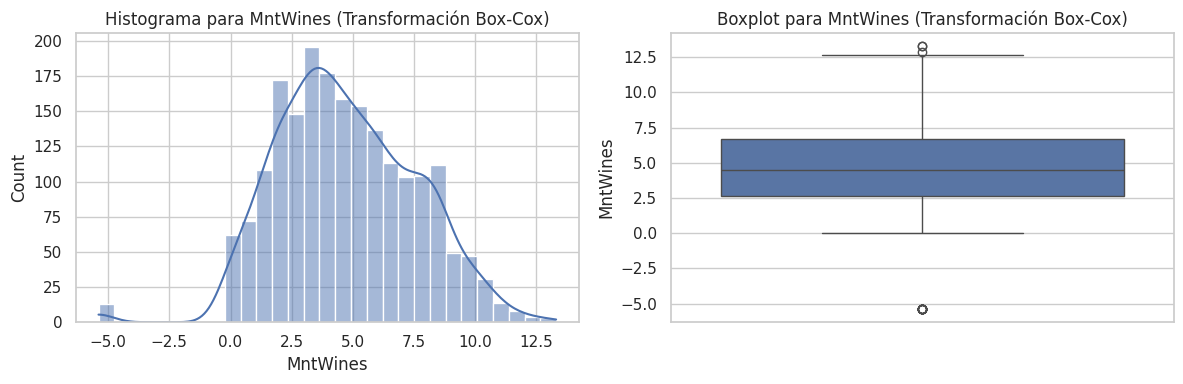

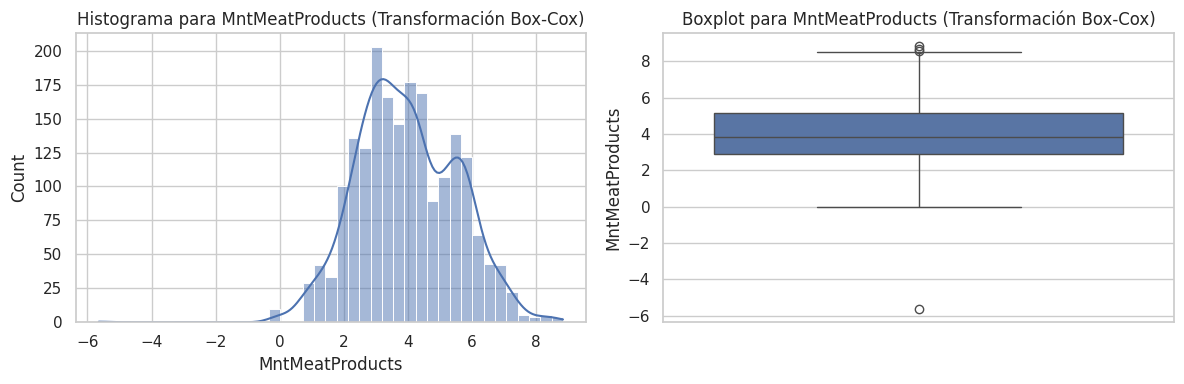

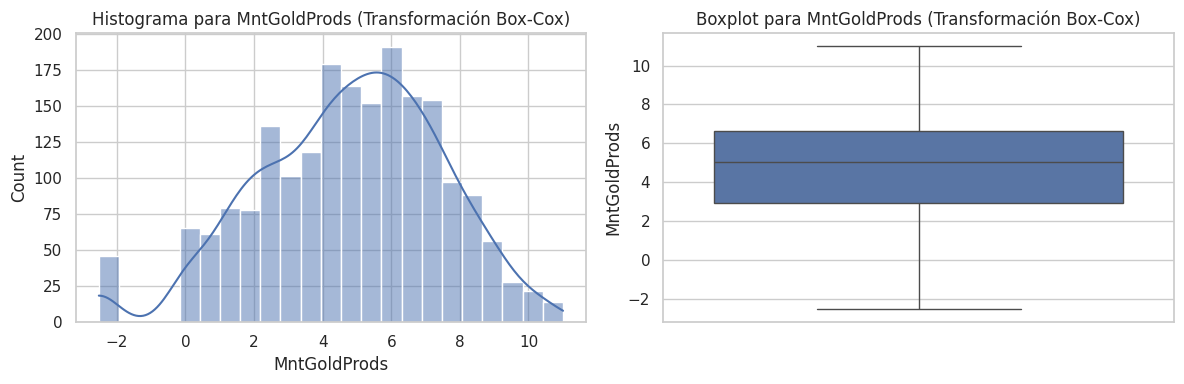

In [ ]:
# Iteramos a través de las columnas transformadas
for col in columns_to_transform:
    plt.figure(figsize=(12, 4))
    # Histograma con curva de densidad
    plt.subplot(1, 2, 1)  # Creamos el primer subplot (1 fila, 2 columnas, posición 1)
    sns.histplot(df_balanced[col], kde=True)  # Graficar el histograma con la curva de densidad (kde)
    plt.title(f'Histograma para {col} (Transformación Box-Cox)')

    # Diagrama de caja
    plt.subplot(1, 2, 2)  # Creamos el segundo subplot (1 fila, 2 columnas, posición 2)
    sns.boxplot(y=df_balanced[col])
    plt.title(f'Boxplot para {col} (Transformación Box-Cox)')

    # Ajustar el diseño para evitar solapamientos
    plt.tight_layout()
    plt.show()

## Normalización de datos

Normalizar es una operación muy importante para garantizar que todos los datos estén en la misma escala de referencia, evitando que las variables con escalas mayores tengan una influencia desproporcionada en el modelo.

Esto es especialmente crítico en algoritmos que dependen de la magnitud de las variables, como el análisis de componentes principales (PCA) que aplicaremos en el próximo step o los métodos basados en distancia como K-Nearest Neighbors (KNN) y K-means.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select columns for scaling (excluding specified columns)
columns_to_scale = [col for col in df_balanced.columns
                    if col not in ['Response', 'Marital_Status_Divorced',
                                   'Marital_Status_Married', 'Marital_Status_Single',
                                   'Marital_Status_Together', 'Marital_Status_Widow', 'Education', 'Complain']]

# Create a StandardScaler object
scaler = StandardScaler()

df_standardizado = df_balanced.copy()

# Fit and transform the selected columns
df_standardizado[columns_to_scale] = scaler.fit_transform(df_balanced[columns_to_scale])

# Display the scaled DataFrame
print(df_standardizado.head())


   Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0          2  2.649522 -1.485742  1.249538 -1.401202  1.017215   0.818410   
1          2 -0.227434  0.564768  1.249538 -1.401202 -0.680761  -0.798281   
2          2 -1.137000  0.564768 -0.727819 -1.401202 -0.936715   1.553270   
3          2  0.802608 -1.485742  1.249538 -1.401202  0.600080  -0.798281   
4          3  2.255267  0.564768 -0.727819 -1.401202  1.052659  -0.210393   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumWebVisitsMonth  \
0         1.122382         1.180150         -0.553151  ...          -3.297037   
1        -2.556560        -0.876036         -0.910755  ...           0.177764   
2         0.097813         0.631834         -0.910755  ...           0.177764   
3        -0.681005        -0.876036         -0.910755  ...          -1.212156   
4         1.163202        -0.876036          1.413669  ...          -1.907117   

   Complain  Antiguedad       Age  Marital_Status_

##PCA

De momento que tenemos muchas variables, y consecuentemente una dimensionalidad elevada, queremos intetar reducir la complejidad del modelo sin perder información importante.

Para hacerlo, hemos decidido quitar algunas columnas que desde la analisis de  importancia operada con Random Forest hemos visto que no aporta mucha información útil y agregar otras con PCA.


In [ ]:
from sklearn.decomposition import PCA

df_pca = df_standardizado.copy()

# Assuming df_balanced is your DataFrame from the previous code
# Create a copy to avoid modifying the original DataFrame

# Define features for the first PCA
features_pca1 = ['NumCatalogPurchases', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumDealsPurchases']

# Apply PCA to the first set of features
pca1 = PCA(n_components=1)
df_pca['pca1_website_info'] = pca1.fit_transform(df_pca[features_pca1])

# Define features for the second PCA
features_pca2 = ['MntSweetProducts', 'MntFishProducts', 'MntFruits']

# Apply PCA to the second set of features
pca2 = PCA(n_components=1)
df_pca['pca2_sweet_fish_fruit'] = pca2.fit_transform(df_pca[features_pca2])

# Drop the original columns and 'Kidhome', 'Complain'
df_final = df_pca.drop(features_pca1 + features_pca2 + ['Kidhome', 'Complain'], axis=1)

# Display the resulting DataFrame
print(df_final.head())
print(df_final.shape)

   Education    Income  Teenhome   Recency  MntWines  MntMeatProducts  \
0          2  2.649522  1.249538 -1.401202  1.017215         1.122382   
1          2 -0.227434  1.249538 -1.401202 -0.680761        -2.556560   
2          2 -1.137000 -0.727819 -1.401202 -0.936715         0.097813   
3          2  0.802608  1.249538 -1.401202  0.600080        -0.681005   
4          3  2.255267 -0.727819 -1.401202  1.052659         1.163202   

   MntGoldProds  NumStorePurchases  Antiguedad       Age  \
0      0.889056           1.161628   -1.510702  1.314963   
1     -2.736730          -0.864420   -2.182682  0.426793   
2      1.072705          -0.864420   -1.779494 -1.744291   
3     -0.695946          -0.189071   -0.973119  0.426793   
4     -1.100874           1.836977   -0.301139 -0.757434   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                    False                    True                  False   
1                    False                   F

# EXTRACCIÓN DE CONOCIMIENTOS EN BASE DE DATOS

## Modelos de clasificación

El dataset estandardizado y con reducción de dimensionalidad aplicada es el siguiente:

In [ ]:
X_final = df_standardizado.drop('Response', axis=1)
y_final = df_standardizado['Response']

print(X_final.shape)
print(y_final.shape)

(1986, 24)
(1986,)


- X se refiere a las variables dependientes,

- y a la independiente que se intentará predecir en la clasificación.

## Arból de clasificación

Un árbol de clasificación es un modelo de aprendizaje supervisado utilizado para clasificar una variable a partir de un conjunto de datos con múltiples características.

La idea principal es dividir los datos en subconjuntos cada vez más pequeños basándose en preguntas o decisiones binarias que se representan como nodos en el árbol. Se empieza desde la caracteristica que divide mejor los datos, en función de un criterio de pureza (Gini o entropia).


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Definisci l'intervallo di parametri da esplorare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [10, 20],
    'ccp_alpha': [0.0, 0.001, 0.003, 0.01]
}

# Valori da testare per n_splits
n_splits_range = [3, 5, 10]

# Per salvare i risultati
results = {}

for n_splits in n_splits_range:
    print(f"\nTesting with {n_splits}-fold cross-validation")

    # Configura la strategia di cross-validation
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Configura GridSearchCV
    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=42),
        param_grid=param_grid,
        scoring='accuracy',
        cv=stratified_kfold,
        verbose=1,
        n_jobs=-1
    )

    # Esegui la ricerca
    grid_search.fit(X_final, y_final)

    # Salva i risultati
    results[n_splits] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

# Mostra i risultati
for n_splits, metrics in results.items():
    print(f"\n{n_splits}-fold cross-validation:")
    print(f"  Best Parameters: {metrics['best_params']}")
    print(f"  Best Validation Score: {metrics['best_score']:.4f}")



Testing with 3-fold cross-validation
Fitting 3 folds for each of 96 candidates, totalling 288 fits

Testing with 5-fold cross-validation
Fitting 5 folds for each of 96 candidates, totalling 480 fits

Testing with 10-fold cross-validation
Fitting 10 folds for each of 96 candidates, totalling 960 fits

3-fold cross-validation:
  Best Parameters: {'ccp_alpha': 0.003, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10}
  Best Validation Score: 0.8620

5-fold cross-validation:
  Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}
  Best Validation Score: 0.8837

10-fold cross-validation:
  Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10}
  Best Validation Score: 0.8953


### Resultados del arból de clasificación

Cross-validation scores: [0.8718593  0.83375315 0.83123426 0.88664987 0.88664987]
Average cross-validation score: 0.862029290026961


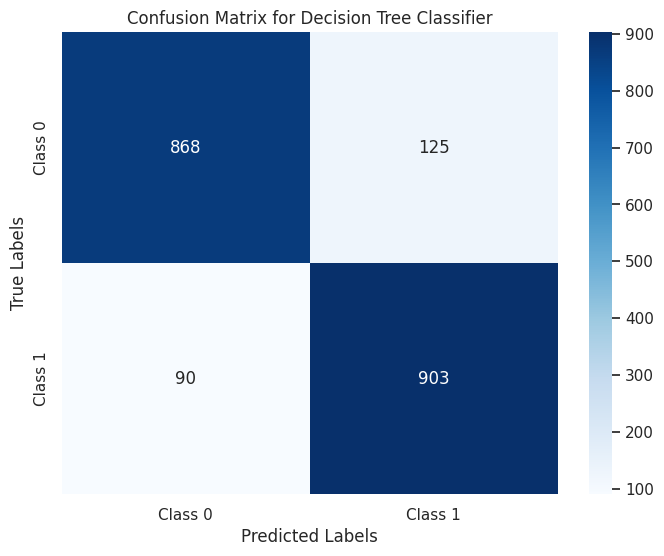

In [ ]:
# prompt: generami un albero di classificazione con validazione crociata utilizzando i dati di X_resampled e y_resampled con matrice di confusione

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=15, min_samples_leaf=20, min_samples_split=10, ccp_alpha = 0.003, random_state=42)

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42) # 5-fold cross-validation

# Perform cross-validation and get accuracy scores
cross_val_scores = cross_val_score(dt_classifier, X_final, y_final, cv=kfold)

print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", cross_val_scores.mean())

# Fit the classifier on the entire resampled dataset to get predictions for the confusion matrix
dt_classifier.fit(X_final, y_final)
y_pred = dt_classifier.predict(X_final)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_final, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

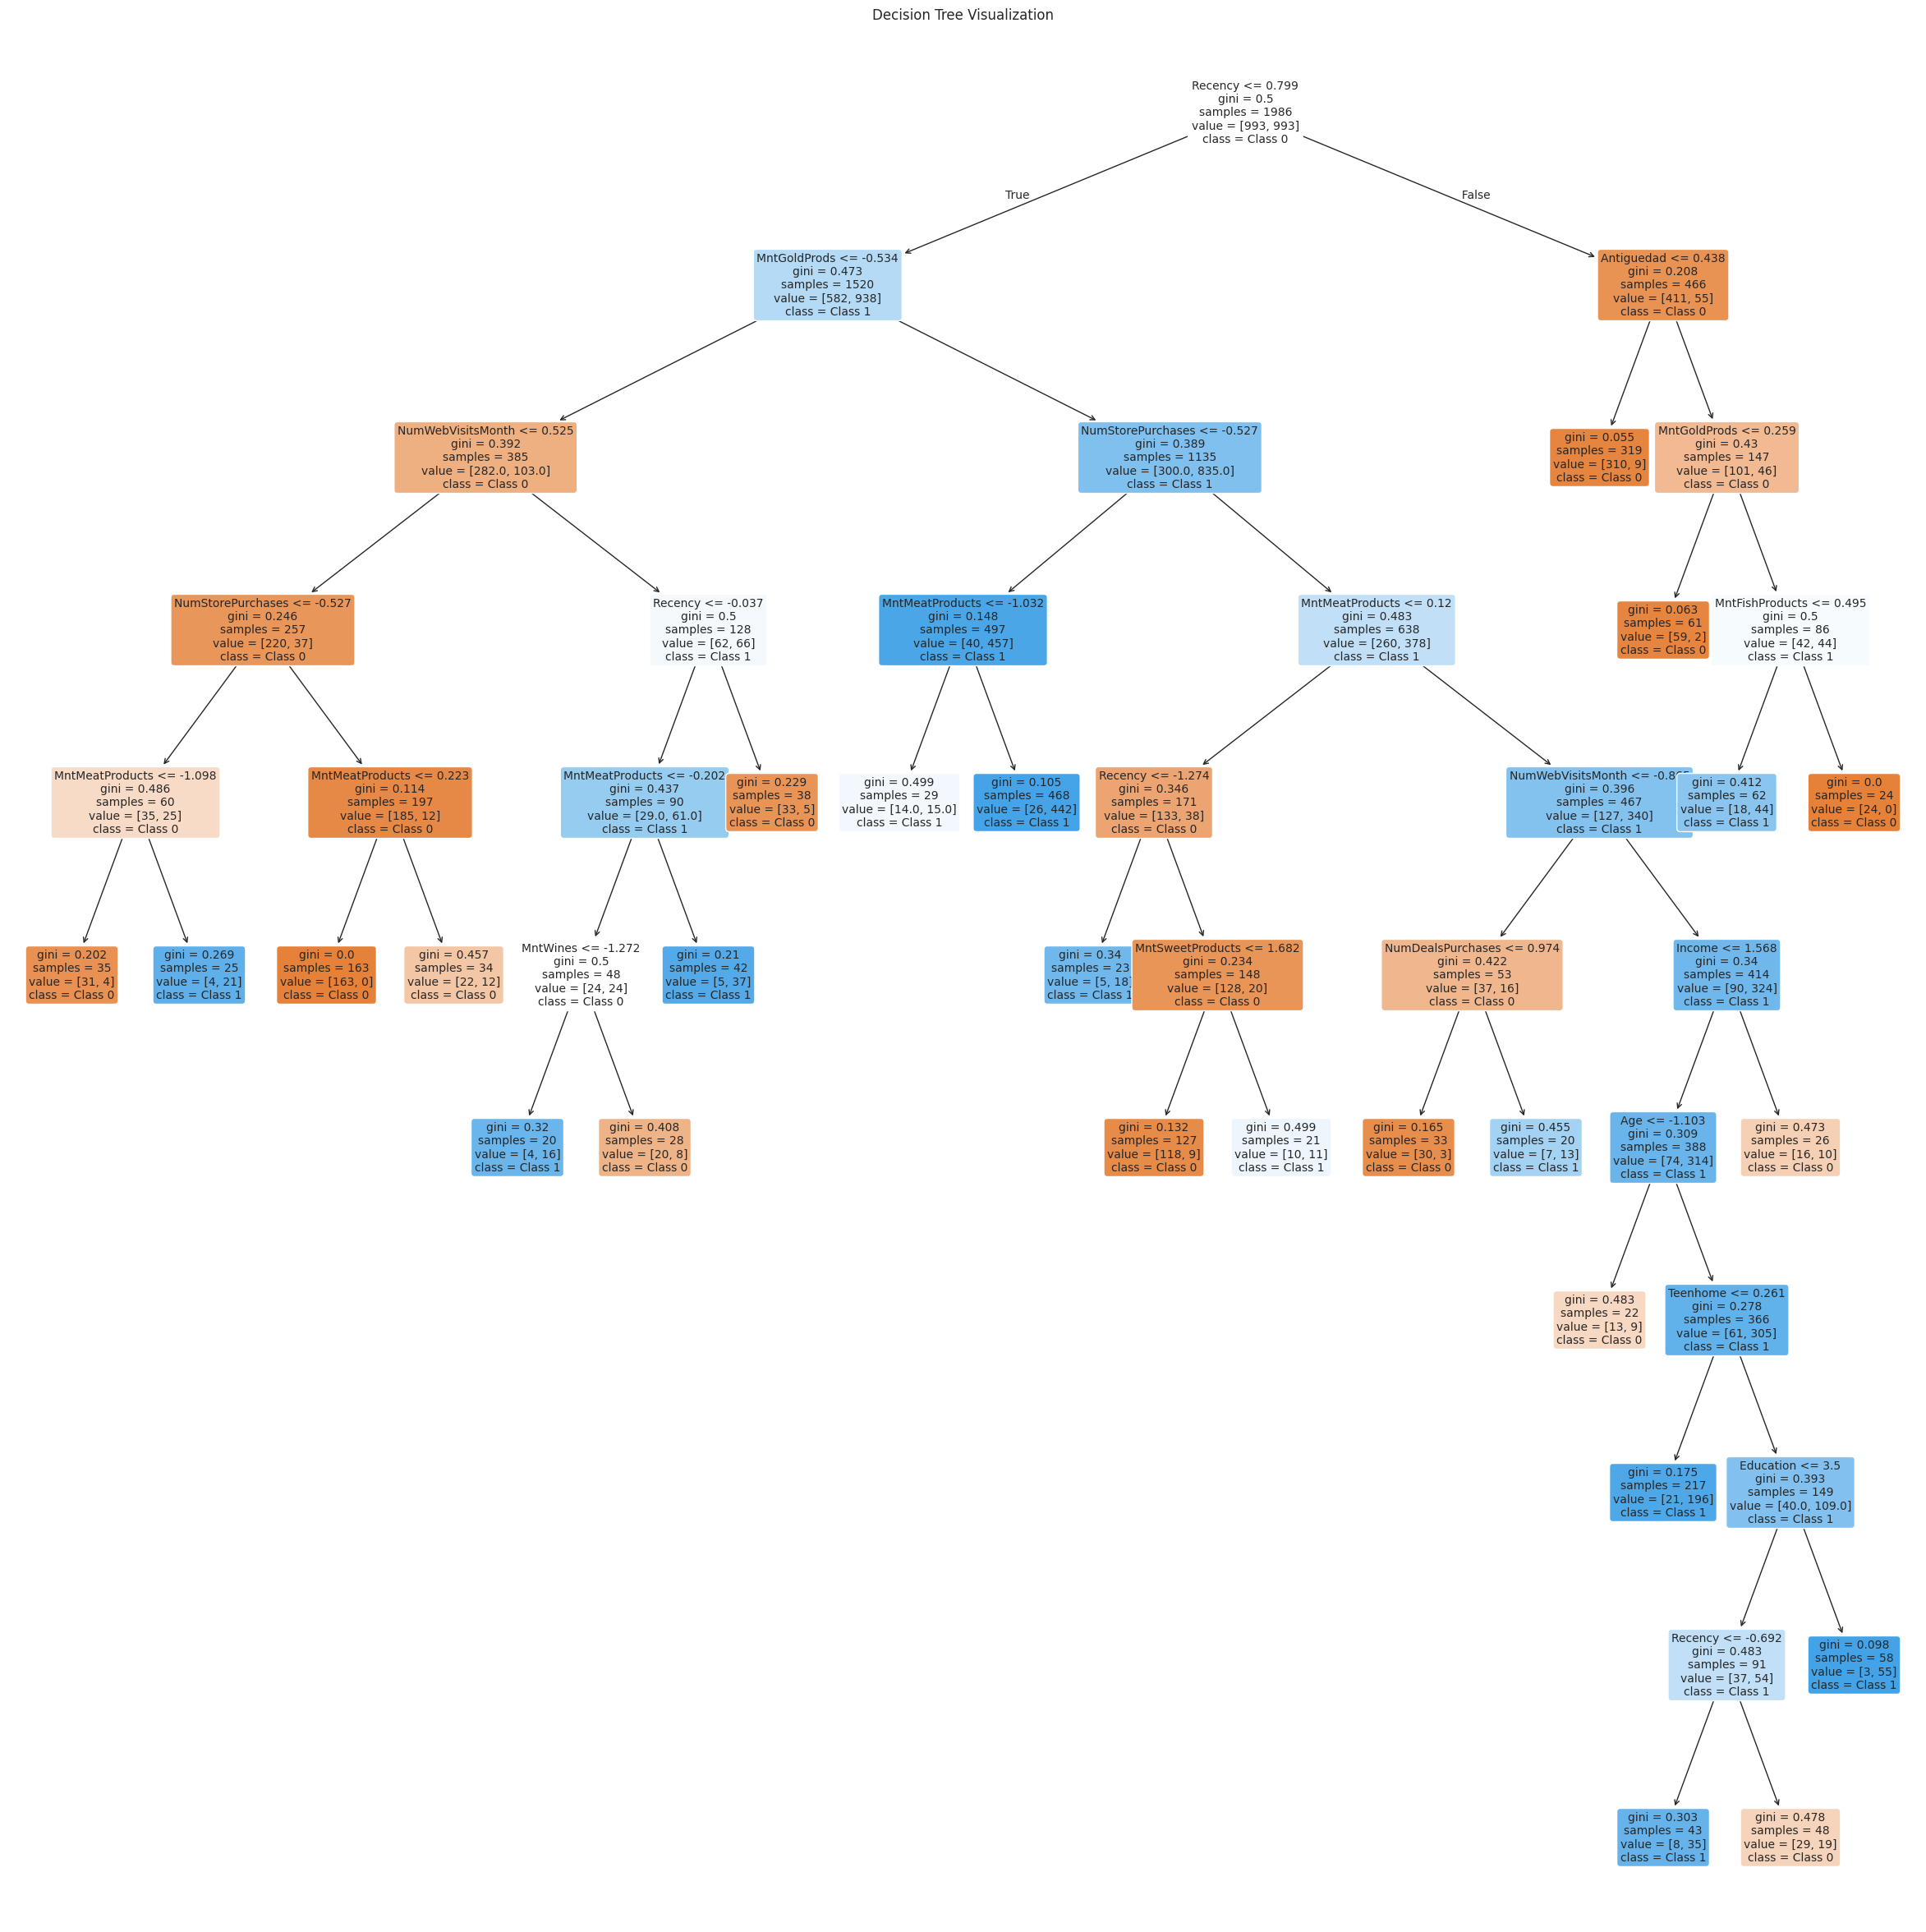

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizza l'albero di decisione
plt.figure(figsize=(30, 30))  # Dimensioni della figura
plot_tree(
    dt_classifier,
    feature_names=X_final.columns,  # Nomi delle caratteristiche (se disponibili)
    class_names=['Class 0', 'Class 1'],  # Etichette delle classi
    filled=True,  # Colora i nodi per visualizzare la purezza
    rounded=True,  # Nodi con bordi arrotondati
    fontsize=10  # Dimensione del testo
)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Supponiamo di avere X_resampled e y_resampled
all_y_true = y_resampled  # Valori reali del target
all_y_pred = dt_classifier.predict(X_final)  # Predizioni del modello

# calculamos las metricas relacionadas con la matriz de confusión
accuracy = accuracy_score(all_y_true, all_y_pred)
precision = precision_score(all_y_true, all_y_pred)
recall = recall_score(all_y_true, all_y_pred)
f1 = f1_score(all_y_true, all_y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Classification Report for more detailed metrics
from sklearn.metrics import classification_report
print(classification_report(all_y_true, all_y_pred))

Accuracy: 0.891742195367573
Precision: 0.8784046692607004
Recall: 0.9093655589123867
F1-score: 0.8936170212765957
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       993
           1       0.88      0.91      0.89       993

    accuracy                           0.89      1986
   macro avg       0.89      0.89      0.89      1986
weighted avg       0.89      0.89      0.89      1986



**ACCURACY**: proporción de predicciones correctas sobre el total - 87%

**PRECISION**: porcentaje de predicciones positivas que realmente son correctas - 80%

**RECALL**: mide cuántos de los positivos reales fueron correctamente identificados

**F1-score**: media entre precisión y recall

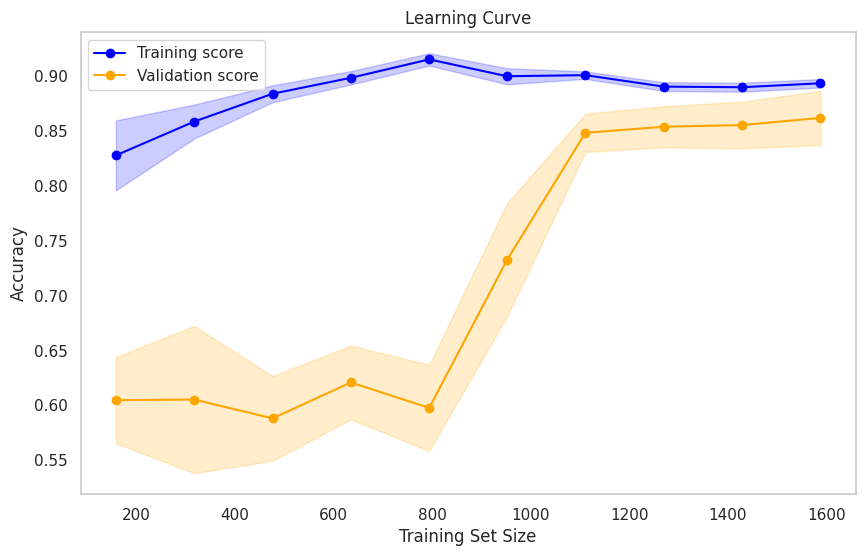

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Funzione per tracciare la curva di apprendimento
def plot_learning_curve(estimator, X, y, cv, scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

    # Media e deviazione standard delle performance
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot delle curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker='o')
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.2, color="blue")
    plt.plot(train_sizes, test_scores_mean, label="Validation score", color="orange", marker='o')
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.2, color="orange")

    # Etichette e titolo
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Esegui la funzione con il Decision Tree
plot_learning_curve(dt_classifier, X_final, y_final, cv=kfold)


Este grafico muestra la curva de accuracy en entrenamiento y validación. Se nota como inicia con valores con mucha discrepancia, porque el modelo empieza muy bien adaptandose al set de entrenamiento sin generalizar.

Pero poco a poco la curva relacionada a la validación sube, esto significa que el modelo empieza a generalizar los datos hasta un punto en el que la curva se estabiliza.

## Knn

Este modelo clasifica un dato nuevo según las clases de sus K vecinos más cercanos en el conjunto de entrenamiento.


### Determinar número de k-fold para validación cruzada

El codigo siguiente sirve para determinar que numero de fold producen una mejor accuracy dado los datos y el modelo KNN





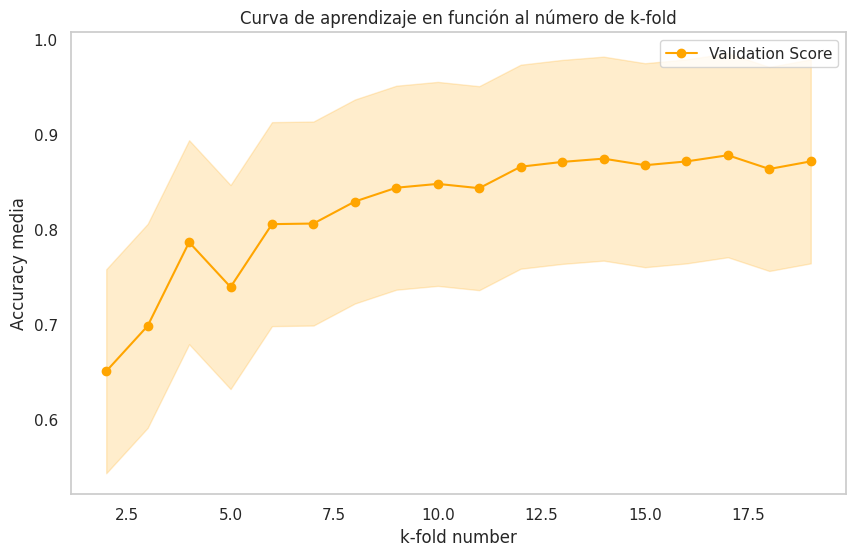

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# número de fold que testamos (de 2 a 8)
k_values = range(2, 20)
mean_train_scores = []
mean_val_scores = []

# iteramos sobre cada k para calcular la accuracy
for k in k_values:
    model = DecisionTreeClassifier(random_state=42)
    val_scores = cross_val_score(model, X_final, y_final, cv=k, scoring='accuracy')
    mean_val_scores.append(val_scores.mean())

# creamos el grafico
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_val_scores, marker='o', label='Validation Score', color='orange')
plt.fill_between(k_values,
                 np.array(mean_val_scores) - np.std(val_scores),
                 np.array(mean_val_scores) + np.std(val_scores),
                 color='orange', alpha=0.2)

plt.xlabel("k-fold number")
plt.ylabel("Accuracy media")
plt.title("Curva de aprendizaje en función al número de k-fold")
plt.legend()
plt.grid()
plt.show()



En este caso hemos eligido 6 porque la accuracy media entre las diferentes validaciones sube de manera significativa hasta el 6 para después estabilizarse.


### Determinar el número de k nearest neighbour

El codigo siguiente sirve para determinar cuantos elementos cercanos a k debemos considerar para nuestro modelo de clasificación.

Un **número bajo** resultará en una accuracy muy grande pero será poco capaz de generalizar, produciendo un overfitting importante ya que el modelo es demasiado sensible a los datos específicos de entrenamiento.

Por otro lado, un **numero alto**, puede resultar en una accuracy baja.

Por esta razón evaluamos el grafico siguiente y elegimos **un número de KNN que sea un compromiso adecuado** entre accuracy y capacidad de generalizar.

Después de aplicar el modelo, evaluaremos los resultados con un grafico que nos permitirá entender si nuestra elección resultó en un modelo capaz o no de generalizar adecuadamente.

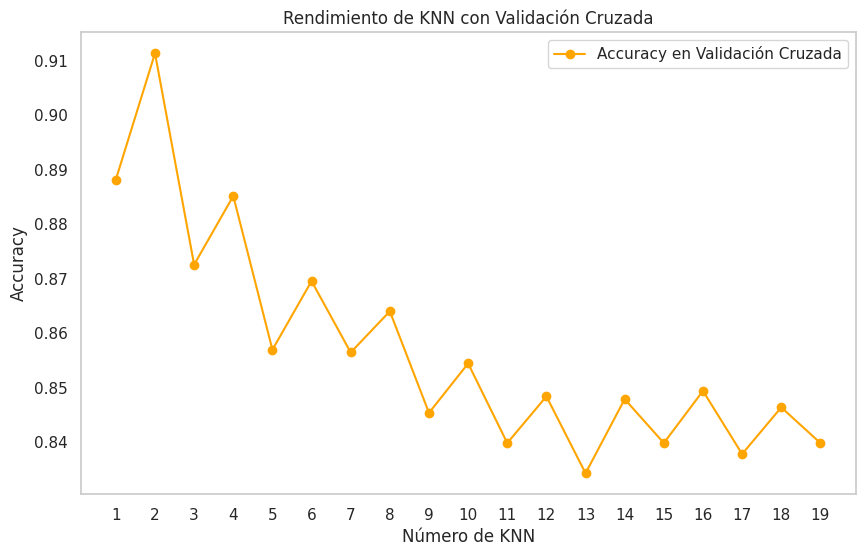

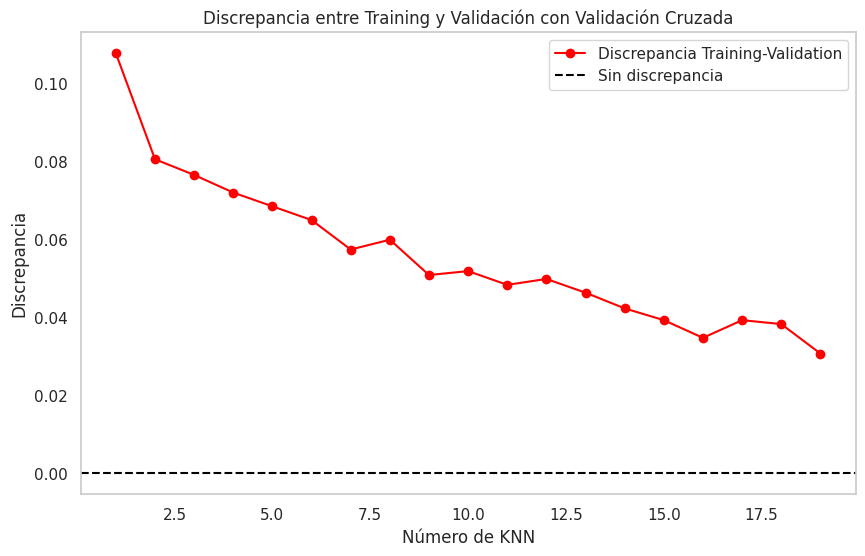

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Lista de valores de k a probar
k_values = range(1, 20)
cv_accuracies = []
train_accuracies = []

# Validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Calcular la precisión media usando validación cruzada con 5 fold
    scores = cross_val_score(knn, X_final, y_final, cv=6, scoring='accuracy')
    cv_accuracies.append(scores.mean())

    # Calcular la precisión en el conjunto de entrenamiento
    knn.fit(X_final, y_final)
    train_accuracy = knn.score(X_final, y_final)
    train_accuracies.append(train_accuracy)

# Calcular la discrepancia entre entrenamiento y validación
discrepancy = [train - test for train, test in zip(train_accuracies, cv_accuracies)]

# Crear el gráfico de validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies, label='Accuracy en Validación Cruzada', color='orange', marker='o')
plt.xlabel('Número de KNN')
plt.ylabel('Accuracy')
plt.title('Rendimiento de KNN con Validación Cruzada')
plt.xticks(k_values)  # Asegurar que los valores del eje x sean enteros
plt.legend()
plt.grid()
plt.show()

# Crear el gráfico de discrepancia
plt.figure(figsize=(10, 6))
plt.plot(k_values, discrepancy, marker='o', label='Discrepancia Training-Validation', color='red')
plt.axhline(y=0, color='black', linestyle='--', label='Sin discrepancia')
plt.xlabel('Número de KNN')
plt.ylabel('Discrepancia')
plt.title('Discrepancia entre Training y Validación con Validación Cruzada')
plt.legend()
plt.grid()
plt.show()


En el primer grafico podemos ver como los valores bajos de k performan muy bien, pero en el grafico sobre la discrepancia entre accuracy en entrenamiento y en validación se nota como con valores < 5 hay una diferencia significativa entre las dos accuracy.

Esto significa que con valores bajo de K, el modelo está en overfitting, o sea, performa muy bien sobre los datos de entrenamiento pero no generaliza (por esto hay discrepancia).

Con valores de k > 10, por lo contrario, el modelo está en underfitting, es decir, no tiene bastante datos para poder performar bien.


En este caso eligiremos KNN = 4

### Aplicamos el modelo KNN

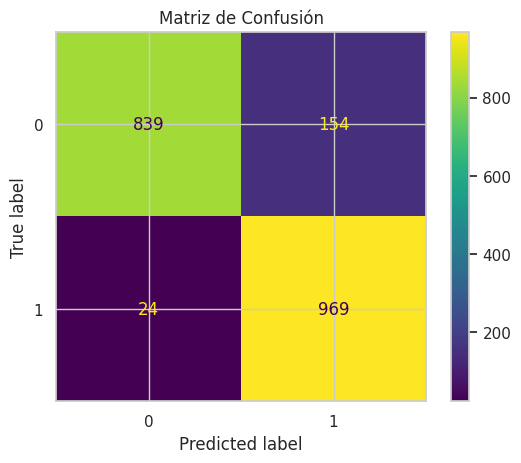

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
stratified_kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

#estos array sirven para guardar los valores reales y predecidos para luego evaluar el modelo
all_y_true = []
all_y_pred = []

#se valida de manera cruzada sobre los datasey X_final y y_final
for train_index, test_index in stratified_kfold.split(X_final, y_final):
    X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
    y_train, y_test = y_final.iloc[train_index], y_final.iloc[test_index]

    # Se entrena el modelo knn
    knn.fit(X_train, y_train)

    # Se predice la variable target
    y_test_pred = knn.predict(X_test)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_test_pred)

#se crea la matriz de confusión gracias a los datos guardados en all_y_true y all_y_pred
cm = confusion_matrix(all_y_true, all_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Matriz de Confusión')
plt.show()

### Resultados del modelo KNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculamos las metricas relacionadas con la matriz de confusión
accuracy = accuracy_score(all_y_true, all_y_pred)
precision = precision_score(all_y_true, all_y_pred)
recall = recall_score(all_y_true, all_y_pred)
f1 = f1_score(all_y_true, all_y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Classification Report for more detailed metrics
from sklearn.metrics import classification_report
print(classification_report(all_y_true, all_y_pred))

Accuracy: 0.9103726082578046
Precision: 0.8628673196794301
Recall: 0.9758308157099698
F1-score: 0.9158790170132325
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       993
           1       0.86      0.98      0.92       993

    accuracy                           0.91      1986
   macro avg       0.92      0.91      0.91      1986
weighted avg       0.92      0.91      0.91      1986



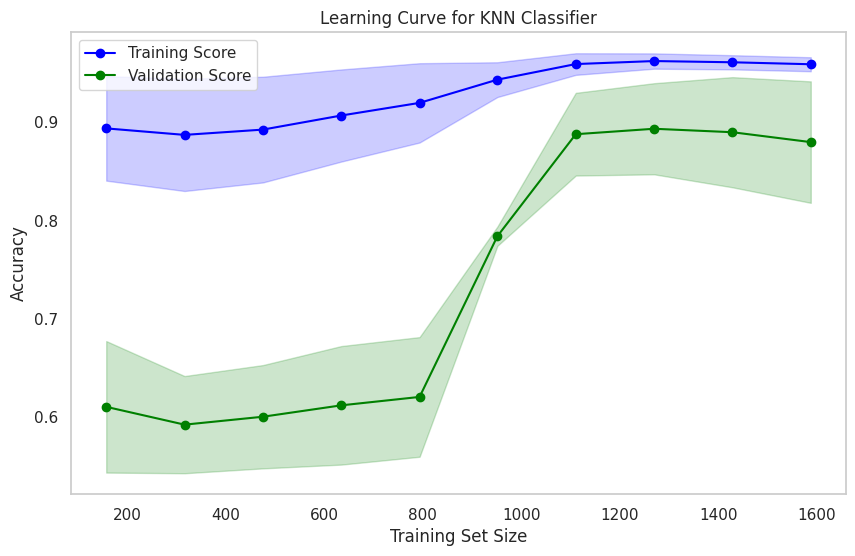

In [ ]:
# Definizione del classificatore KNN
knn_classifier = KNeighborsClassifier(n_neighbors=4)  # Cambia n_neighbors se necessario

# Calcolo della learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=knn_classifier,
    X=X_final,  # Assumi che X_resampled contenga i dati di allenamento
    y=y_final,  # Assumi che y_resampled contenga le etichette di allenamento
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

# Calcolo della media e della deviazione standard delle performance
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, validation_mean, label='Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.2)

plt.title('Learning Curve for KNN Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

De manera similar a la curva de comparación entre entrenamiento y validación del arból de clasificación, el modelo empieza a generalizar cerca de las 2000 observaciones.

A partir de este momento, hay poca discrepancia entre training y validation.

Aumentando demasiado los datos se puede ver como la accuracy disminuye. Este effecto se llama underfitting por exceso de datos.


## Naive Bayes

Naive Bayes es un modelo de clasificación basado en la teoría de probabilidad bayesiana que asume que las características son independientes entre sí.
Clasifica un dato calculando la probabilidad de que pertenezca a cada clase, dadas sus características, eligiendo la clase con la probabilidad más alta.

Sin embargo, su rendimiento puede verse afectado si las características no son realmente independientes.

En este caso, de momento que en el estudio de correlación había muchas relaciones que podrían no haberse perfectamente solucionado con las medidas actuadas (por no perder demasiado información), nos esperamos una performance menor en respecto a los otros modelos de clasificación operados.


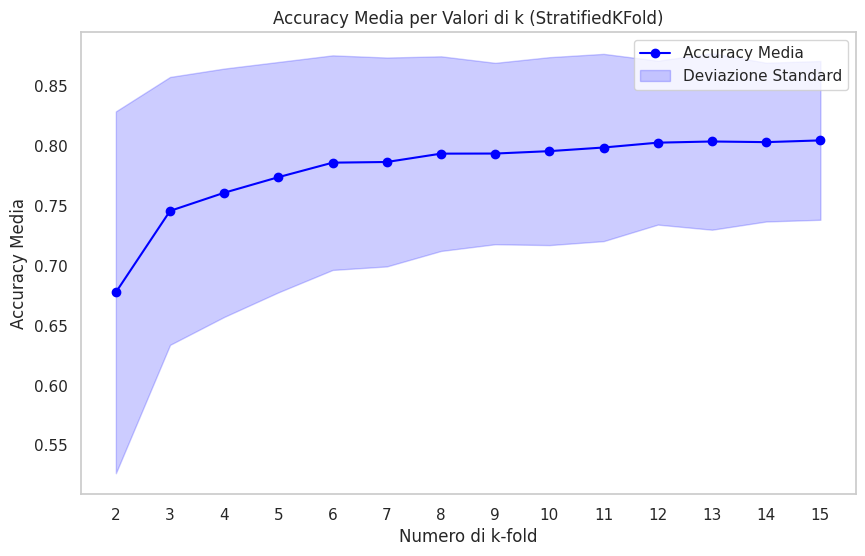

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Definizione del classificatore
nb_classifier = GaussianNB()

# Definisci i nuovi valori di k da testare (5 a 15)
k_values = range(2, 16)

# Per salvare i risultati
results = {}

# Loop attraverso i valori di k
for k in k_values:
    # Configura StratifiedKFold con il valore corrente di k
    stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # Calcola l'accuracy media con cross-validation
    scores = cross_val_score(nb_classifier, X_final, y_final, cv=stratified_kfold, scoring='accuracy')
    results[k] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores)
    }

# Prepara i dati per il grafico
k_list = list(results.keys())
mean_accuracies = [results[k]['mean_accuracy'] for k in k_list]
std_accuracies = [results[k]['std_accuracy'] for k in k_list]

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(k_list, mean_accuracies, marker='o', label='Accuracy Media', color='blue')
plt.fill_between(k_list,
                 [m - s for m, s in zip(mean_accuracies, std_accuracies)],
                 [m + s for m, s in zip(mean_accuracies, std_accuracies)],
                 color='blue', alpha=0.2, label='Deviazione Standard')
plt.title('Accuracy Media per Valori di k (StratifiedKFold)')
plt.xlabel('Numero di k-fold')
plt.ylabel('Accuracy Media')
plt.xticks(k_list)
plt.legend(loc='best')
plt.grid()
plt.show()


En este caso, hemos decidido aplicar una validación cruzada con k-fold = 3 en cuanto después de este valor la curva se estabiliza, enseñando que no hay un incremento significativo en accuracy.

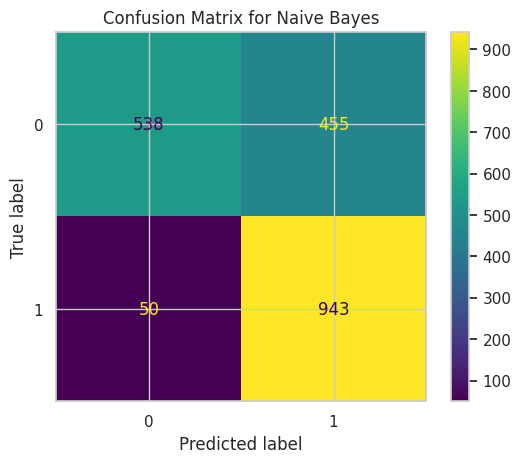

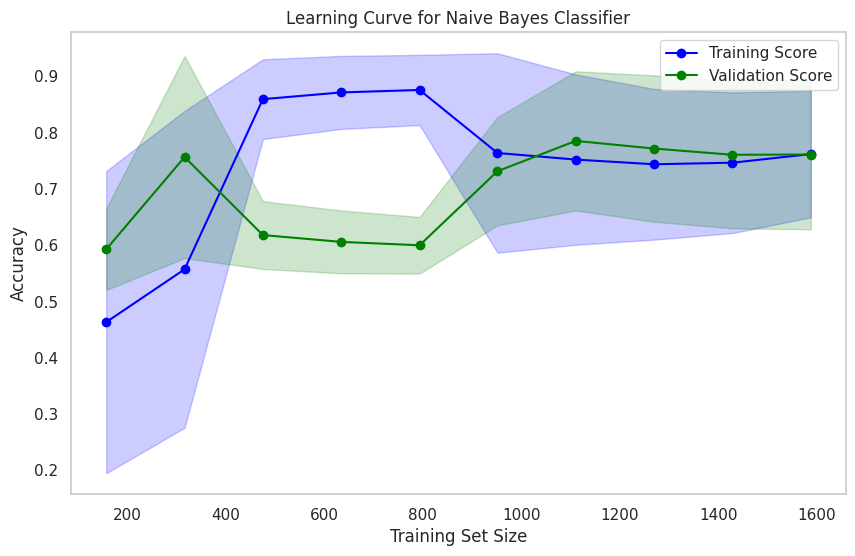

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Define the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the cross-validation strategy
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Store true and predicted values for evaluation
all_y_true = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X_final, y_final):
    X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
    y_train, y_test = y_final.iloc[train_index], y_final.iloc[test_index]

    # Train the classifier
    nb_classifier.fit(X_train, y_train)

    # Predict the target variable
    y_test_pred = nb_classifier.predict(X_test)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_test_pred)

# Create the confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Learning Curve for Naive Bayes
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=nb_classifier,
    X=X_final,
    y=y_final,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, validation_mean, label='Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.2)

plt.title('Learning Curve for Naive Bayes Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

### Resultados de Naives Bayes

In [ ]:
# Calculate and print overall metrics
accuracy = accuracy_score(all_y_true, all_y_pred)
precision = precision_score(all_y_true, all_y_pred, average='weighted')
recall = recall_score(all_y_true, all_y_pred, average='weighted')
f1 = f1_score(all_y_true, all_y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# Print classification metrics
print("Classification Report:")
print(classification_report(all_y_true, all_y_pred))



Accuracy: 0.7457
Precision (weighted): 0.7948
Recall (weighted): 0.7457
F1-score (weighted): 0.7347
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.54      0.68       993
           1       0.67      0.95      0.79       993

    accuracy                           0.75      1986
   macro avg       0.79      0.75      0.73      1986
weighted avg       0.79      0.75      0.73      1986



## Comparación entre modelo de clasificación

**Los resultados siempre dependen en los objetivos del negocio,** si por ejemplo quiere detectar mejor un indicador u otro.

Por ejemplo, si el costo de un falso positivo es alto porque se gastan recursos en llamar clientes que no aceptan la oferta, sería mejor elegir un modelo que tiene los FP bajos.

Por lo contrario, si se prefiere identificar los clientes que con mayor probabilidad compraran la membresía, será mejor elegir un modelo con FN bajo.
En este caso eligiremos un **F1-score** porque es un indicador que equilibra estos dos aspectos.

El modelo que tiene un F1-score más alto es el **KNN** (0.91).


## Modelos de agrupramiento

Los modelos de agrupamiento son modelos de aprendizaje no supervisado que agrupan datos similares en grupos o clústeres basándose en sus características, sin necesitar etiquetas previas.
Por esta razón, antes de empezar quitamos la variable usada para clasificar(Response) desde el último dataset antes de aplicar la PCA.

In [ ]:
df_agrupamiento = df_balanced.drop('Response', axis=1)
df_agrupamiento.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          2  67267.0        0         1        0  7.578715         11   
1          2  32474.0        1         1        0  2.807766          0   
2          2  21474.0        1         0        0  2.088591         16   
3          2  44931.0        0         1        0  6.406654          0   
4          3  62499.0        1         0        0  7.678303          4   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumStorePurchases  \
0     5.710153e+00               15                 2  ...                  5   
1     9.999996e-07                0                 0  ...                  2   
2     4.119902e+00               11                 0  ...                  2   
3     2.911085e+00                0                 0  ...                  3   
4     5.773512e+00                0                13  ...                  6   

   NumWebVisitsMonth  Complain  Antiguedad  Age  Marital_Status_Divorced  \
0                  2         0           6   67                    False   
1                  7         0           1   58                    False   
2                  7         0           4   36                    False   
3                  5         0          10   58                    False   
4                  4         0          15   46                    False   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                    True                  False                    False   
1                   False                  False                     True   
2                   False                   True                    False   
3                   False                  False                     True   
4                   False                  False                     True   

   Marital_Status_Widow  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 24 columns]

In [ ]:
# Select columns for scaling (excluding specified columns)
columns_to_scale = [col for col in df_agrupamiento.columns
                    if col not in ['Response', 'Marital_Status_Divorced',
                                   'Marital_Status_Married', 'Marital_Status_Single',
                                   'Marital_Status_Together', 'Marital_Status_Widow', 'Education', 'Complain']]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df_agrupamiento[columns_to_scale] = scaler.fit_transform(df_agrupamiento[columns_to_scale])

# Display the scaled DataFrame
print(df_agrupamiento.head())

   Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0          2  2.649522 -1.485742  1.249538 -1.401202  1.017215   0.818410   
1          2 -0.227434  0.564768  1.249538 -1.401202 -0.680761  -0.798281   
2          2 -1.137000  0.564768 -0.727819 -1.401202 -0.936715   1.553270   
3          2  0.802608 -1.485742  1.249538 -1.401202  0.600080  -0.798281   
4          3  2.255267  0.564768 -0.727819 -1.401202  1.052659  -0.210393   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumStorePurchases  \
0         1.122382         1.180150         -0.553151  ...           1.161628   
1        -2.556560        -0.876036         -0.910755  ...          -0.864420   
2         0.097813         0.631834         -0.910755  ...          -0.864420   
3        -0.681005        -0.876036         -0.910755  ...          -0.189071   
4         1.163202        -0.876036          1.413669  ...           1.836977   

   NumWebVisitsMonth  Complain  Antiguedad       A

### K-Means

K-mean es un algoritmo de agrupamiento basado en prototipos, donde el prototipo de un clúster se representa a través del centroide, el punto medio de los datos dentro de lo mismo.

Es un aprendizaje no supervisionado, esto significa que no se sabe el número de clústeres exacto a priori.

Para encontrar el número más adecuado en términos de distancia del centroide, se pueden utilizar dos técnicas:


#### Metodo del codo (Elbow method)

Evalúa el número óptimo de clústeres al medir la inercia o la suma de las distancias al cuadrado entre los puntos y el centroide de sus respectivos clústeres.

A medida que aumenta el número de clústeres, la inercia disminuye, pero en un punto, esta reducción se vuelve marginal, formando un 'codo' en el gráfico.

Ese punto representa el número óptimo de clústeres, ya que agregar más no mejora significativamente la calidad del agrupamiento.

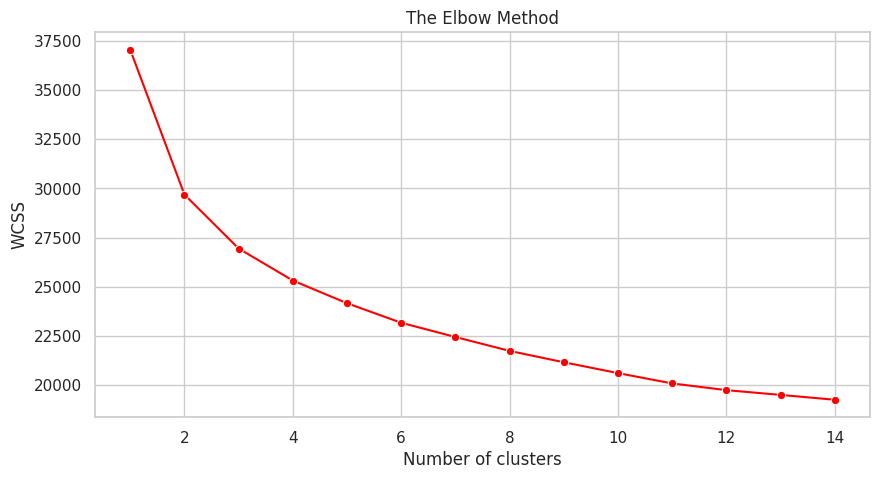

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_agrupamiento)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 15), y=wcss, marker='o', color='red') # Pass x and y as keyword arguments
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

La gráfica muestra:
-	en el eje horizontal el número de clústeres utilizados en el modelo.
-	en el eje vertical mide la suma de las distancias cuadradas entre los puntos y el centroide de su clúster.

Cuanto menor sea el WCSS, más compactos son los clústeres.

Al aumentar el número de clústeres, el WCSS disminuye porque los puntos están más cerca de sus centroides (clusteres más pequeños).
El codo en la curva indica el punto donde agregar más clústeres deja de mejorar significativamente la reducción del WCSS, lo que significa que sería el mejor número de clústeres en que dividir el conjunto de datos.
En este caso, hemos decidido dividir en 4 clústeres.


#### Silhouette score

Este indicador mide cuán cerca están los puntos de su propio clúster (cohesión) y cuán lejos están de los puntos de otros clústeres (separación).

Un valor alto indica que los puntos están bien agrupados alrededor de su centroide y bien separados de otros clústeres.

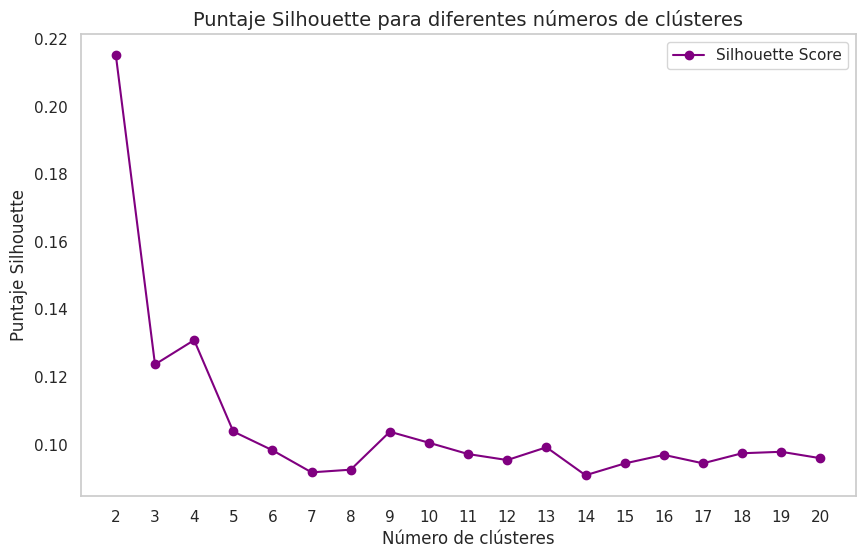

In [ ]:
from sklearn.metrics import silhouette_score

# Definimos el rango de clústeres que queremos evaluar (de 2 a 20)
# No se puede calcular el Silhouette Score para un solo clúster
range_clusters = range(2, 21)

# Lista para almacenar los puntajes de Silhouette para cada número de clústeres
silhouette_scores = []

# Iteramos sobre el rango de clústeres para calcular el puntaje de Silhouette
for n_clusters in range_clusters:

    # Inicializamos el modelo K-Means con el número actual de clústeres
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Ajustamos el modelo y obtenemos las etiquetas de los clústeres
    cluster_labels = kmeans.fit_predict(df_agrupamiento)

    # Calculamos el puntaje de Silhouette para las etiquetas obtenidas
    score = silhouette_score(df_agrupamiento, cluster_labels)

    # Guardamos el puntaje en la lista
    silhouette_scores.append(score)

# Creamos el gráfico para visualizar los puntajes de Silhouette
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(range_clusters, silhouette_scores, marker='o', color='purple', label='Silhouette Score')
plt.title('Puntaje Silhouette para diferentes números de clústeres', fontsize=14)  # Título del gráfico
plt.xlabel('Número de clústeres', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Puntaje Silhouette', fontsize=12)  # Etiqueta del eje Y
plt.xticks(range_clusters)  # Mostrar los valores probados en el eje X
plt.grid()  # Agregar una cuadrícula para mejor lectura
plt.legend(loc='best')  # Agregar la leyenda en la mejor posición
plt.show()  # Mostrar el gráfico



Diferentemente al metodo del codo, aquí buscamos un compromiso entre un buen silhouette score y una buena segmentación.

Con un numero de clusteres = 4, todavía tenemos una buena punctuación y logramos una segmentación más detallada, que permite identificar más grupos diferenciados dentro de los datos sin comprometer demasiado la calidad del agrupamiento.



#### Aplicación de K-Means


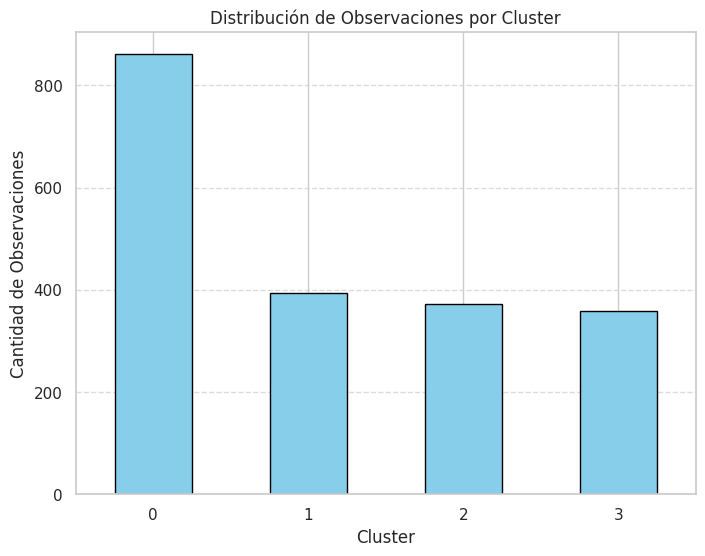

Porcentaje de Response=1 por cluster (K-Means):
Cluster
3    0.715877
0    0.614402
1    0.482234
2    0.045699
Name: Response, dtype: float64


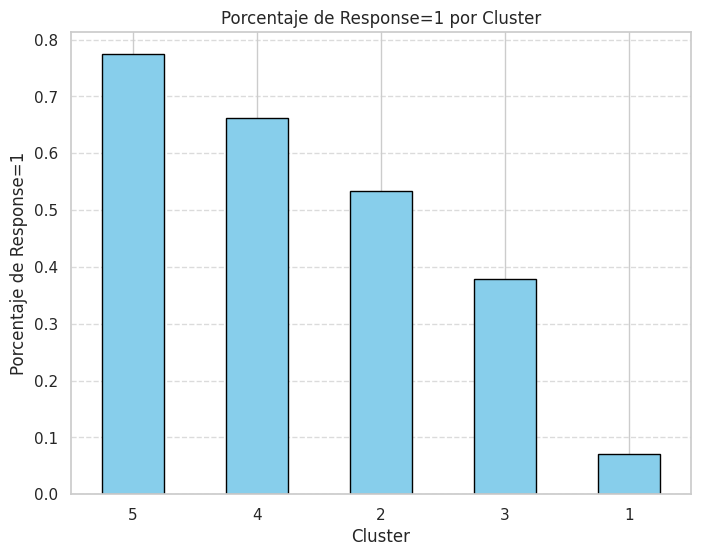

In [ ]:
from sklearn.cluster import KMeans

# Inicializamos el modelo K-Means con 4 clústeres
kmeans = KMeans(n_clusters=4, random_state=42)

# Creamos una copia del dataset original para trabajar con K-Means
df_k_means = df_agrupamiento.copy()

# Ajustamos el modelo K-Means y añadimos las etiquetas de clúster al dataset
df_k_means['Cluster'] = kmeans.fit_predict(df_k_means)

# Añadimos la columna 'Response' al dataset desde df_balanced
df_k_means['Response'] = df_balanced['Response']


# Crear un histograma con la cuenta de observaciones por clúster
plt.figure(figsize=(8, 6))
df_k_means['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de Observaciones por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Observaciones")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analizamos la relación entre los clústeres generados por K-Means y la variable 'Response'
response_analysis_kmeans = df_k_means.groupby('Cluster')['Response'].mean().sort_values(ascending=False)
print("Porcentaje de Response=1 por cluster (K-Means):")
print(response_analysis_kmeans)


# Graficar los resultados
plt.figure(figsize=(8, 6))
response_analysis.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Porcentaje de Response=1 por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Porcentaje de Response=1")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### Visualización de los clusteres

Hemos aplicado K-mean sobre el dataset sin PCA aplicada porque para visualizar los clusteres aplicaremos de nuevo PCA para reducir las componentes principales a 3 (las dimensiones máximas que nos permiten visualizar los clusteres).

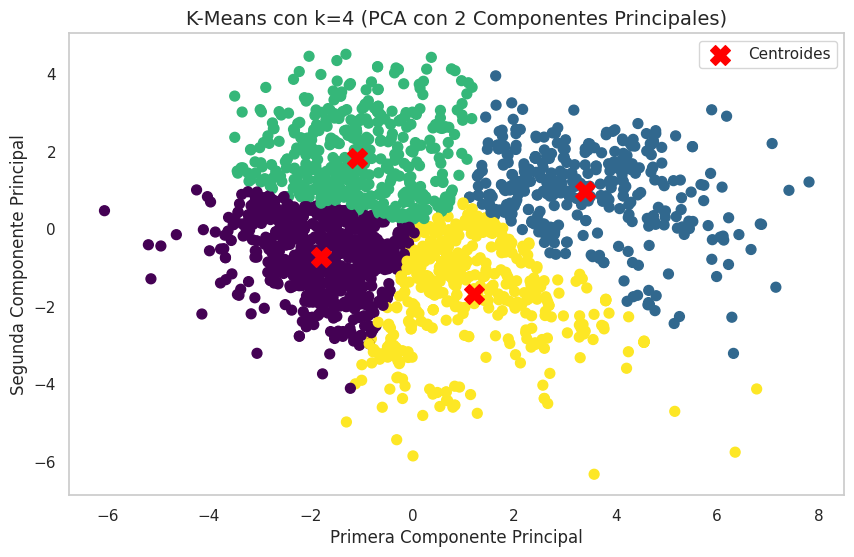

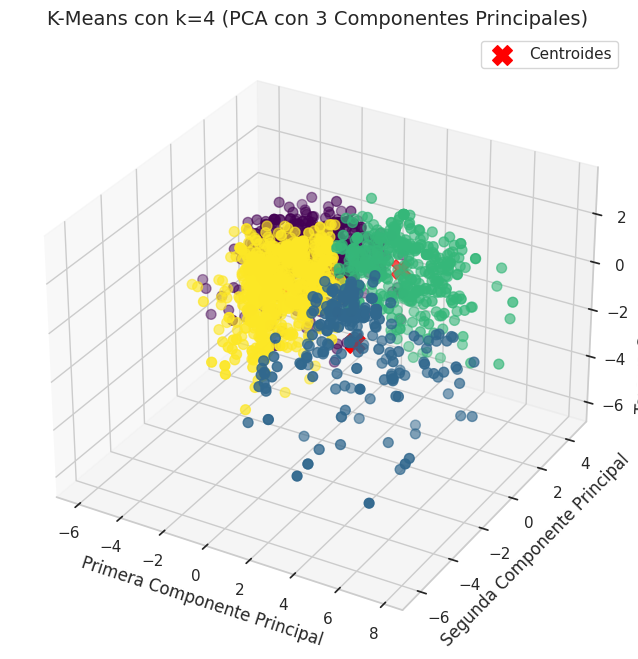

Contribución porcentual de las variables a las componentes principales:
                               PC1        PC2        PC3
Education                12.491039  22.309462  21.264270
Income                   29.919689  28.780850 -10.254792
Kidhome                 -15.069996  -5.656513  25.955729
Teenhome                 19.829120  35.815802  -6.890682
Recency                  -0.230669   5.518717 -24.973078
MntWines                 38.855996  13.581449  16.346835
MntFruits                13.328326 -34.066172 -28.468299
MntMeatProducts          36.547533 -15.511947   9.807083
MntFishProducts          12.489003 -32.383014 -33.402473
MntSweetProducts         13.991101 -35.326966 -31.978400
MntGoldProds             20.497840 -30.412453   2.153998
NumDealsPurchases        29.886421  -7.288519  26.814420
NumWebPurchases          35.997302  -8.526204  17.497718
NumCatalogPurchases      28.108561  -5.537520  -2.191126
NumStorePurchases        34.691425  10.747011 -13.749079
NumWebVisitsMont

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Eliminar la variable 'Cluster' del dataset antes de aplicar PCA
df_agrupamiento_pca = df_agrupamiento.copy()

# Aplicar PCA con 2 componentes principales
pca_2d = PCA(n_components=2)
pca_data_2d = pca_2d.fit_transform(df_agrupamiento_pca)  # Dataset reducido a 2 dimensiones

# Modelo K-Means con k=4 usando el dataset reducido a 2D
kmeans_2d = KMeans(n_clusters=4, random_state=42)
cluster_labels_2d = kmeans_2d.fit_predict(pca_data_2d)  # Etiquetas de los clústeres

# Visualización en 2D
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_data_2d[:, 0],  # Primera componente principal
    pca_data_2d[:, 1],  # Segunda componente principal
    c=cluster_labels_2d,  # Color por clúster
    cmap='viridis', s=50
)
plt.scatter(
    kmeans_2d.cluster_centers_[:, 0],
    kmeans_2d.cluster_centers_[:, 1],
    c='red', marker='X', s=200, label='Centroides'
)
plt.title('K-Means con k=4 (PCA con 2 Componentes Principales)', fontsize=14)
plt.xlabel('Primera Componente Principal', fontsize=12)
plt.ylabel('Segunda Componente Principal', fontsize=12)
plt.legend(loc='best')
plt.grid()
plt.show()

# Aplicar PCA con 3 componentes principales
pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(df_agrupamiento_pca)  # Dataset reducido a 3 dimensiones

# Modelo K-Means con k=4 usando el dataset reducido a 3D
kmeans_3d = KMeans(n_clusters=4, random_state=42)
cluster_labels_3d = kmeans_3d.fit_predict(pca_data_3d)

# Visualización en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    pca_data_3d[:, 0],  # Primera componente principal
    pca_data_3d[:, 1],  # Segunda componente principal
    pca_data_3d[:, 2],  # Tercera componente principal
    c=cluster_labels_3d, cmap='viridis', s=50
)
ax.scatter(
    kmeans_3d.cluster_centers_[:, 0],
    kmeans_3d.cluster_centers_[:, 1],
    kmeans_3d.cluster_centers_[:, 2],
    c='red', marker='X', s=200, label='Centroides'
)
ax.set_title('K-Means con k=4 (PCA con 3 Componentes Principales)', fontsize=14)
ax.set_xlabel('Primera Componente Principal', fontsize=12)
ax.set_ylabel('Segunda Componente Principal', fontsize=12)
ax.set_zlabel('Tercera Componente Principal', fontsize=12)
ax.legend(loc='best')
plt.show()

# Análisis de los loadings con PCA (contribución de variables a las componentes principales)
pca_full = PCA(n_components=3)  # PCA para obtener las primeras 3 componentes principales
pca_full.fit(df_agrupamiento_pca)

# Calcular los loadings (contribuciones de variables)
loadings = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i+1}' for i in range(pca_full.n_components_)],
    index=df_agrupamiento_pca.columns
)

# Convertir a porcentaje
loadings_percent = loadings * 100

# Imprimir los loadings en porcentaje
print("Contribución porcentual de las variables a las componentes principales:")
print(loadings_percent)


### Agrupamiento jerarquico

Este tipo de agrupamiento une entre ellos elementos similares.

El algoritmo empieza considerando cada punto como un clúster individual y agrupa los similares progresivamente, iterando hasta que todos los elementos están en un único clúster.

Si la cantidad de observaciones lo permite, se suele representar visualmente con el **dendograma**, un gráfico parecido a un árbol que identifica las uniones de los clústeres, de los pequeños hasta el mayor.

Se evaluarán 3 tipos de dendogramas que se diferencian por el tipo de linkage (como se calcula la distancia entre los clústeres):
- **Single**: considera la distancia mínima entre dos puntos de diferentes grupos.
- **Centroide**: se considera la distancia entre los puntos medios de cada clúster (centroide).
- **Ward**: considera la varianza dentro de los clústeres y junta solo los que van a crear grupos más homogéneo y compactos.
Después crear un dendograma, hay que mirar a su estructura y decidir a qué punto cortarlo para delinear los grupos. Generalmente se corta en el punto en
que hay un salto más alto entre los clústeres, lo que significa que se están fondeando clústeres muy lejos entre ellos.

Para evaluar cual dendograma diferencia mejor los grupos por el conjunto de datos, se generan los 3 tipos con un corte genérico y se calculan dos índices:
- El coeficiente cophenetico: se calcula comparando la matriz de proximidad real con la matriz de proximidad de los puntos en los clústeres del dendograma.
- El Silhouette score: indica la cohesión y la separación de los grupos entre ellos.

Índice cofenético (ward): 0.4521
Silhouette Score (ward): 0.1128

Índice cofenético (centroid): 0.7061
Silhouette Score (centroid): 0.2827

Índice cofenético (single): 0.6148
Silhouette Score (single): 0.3733



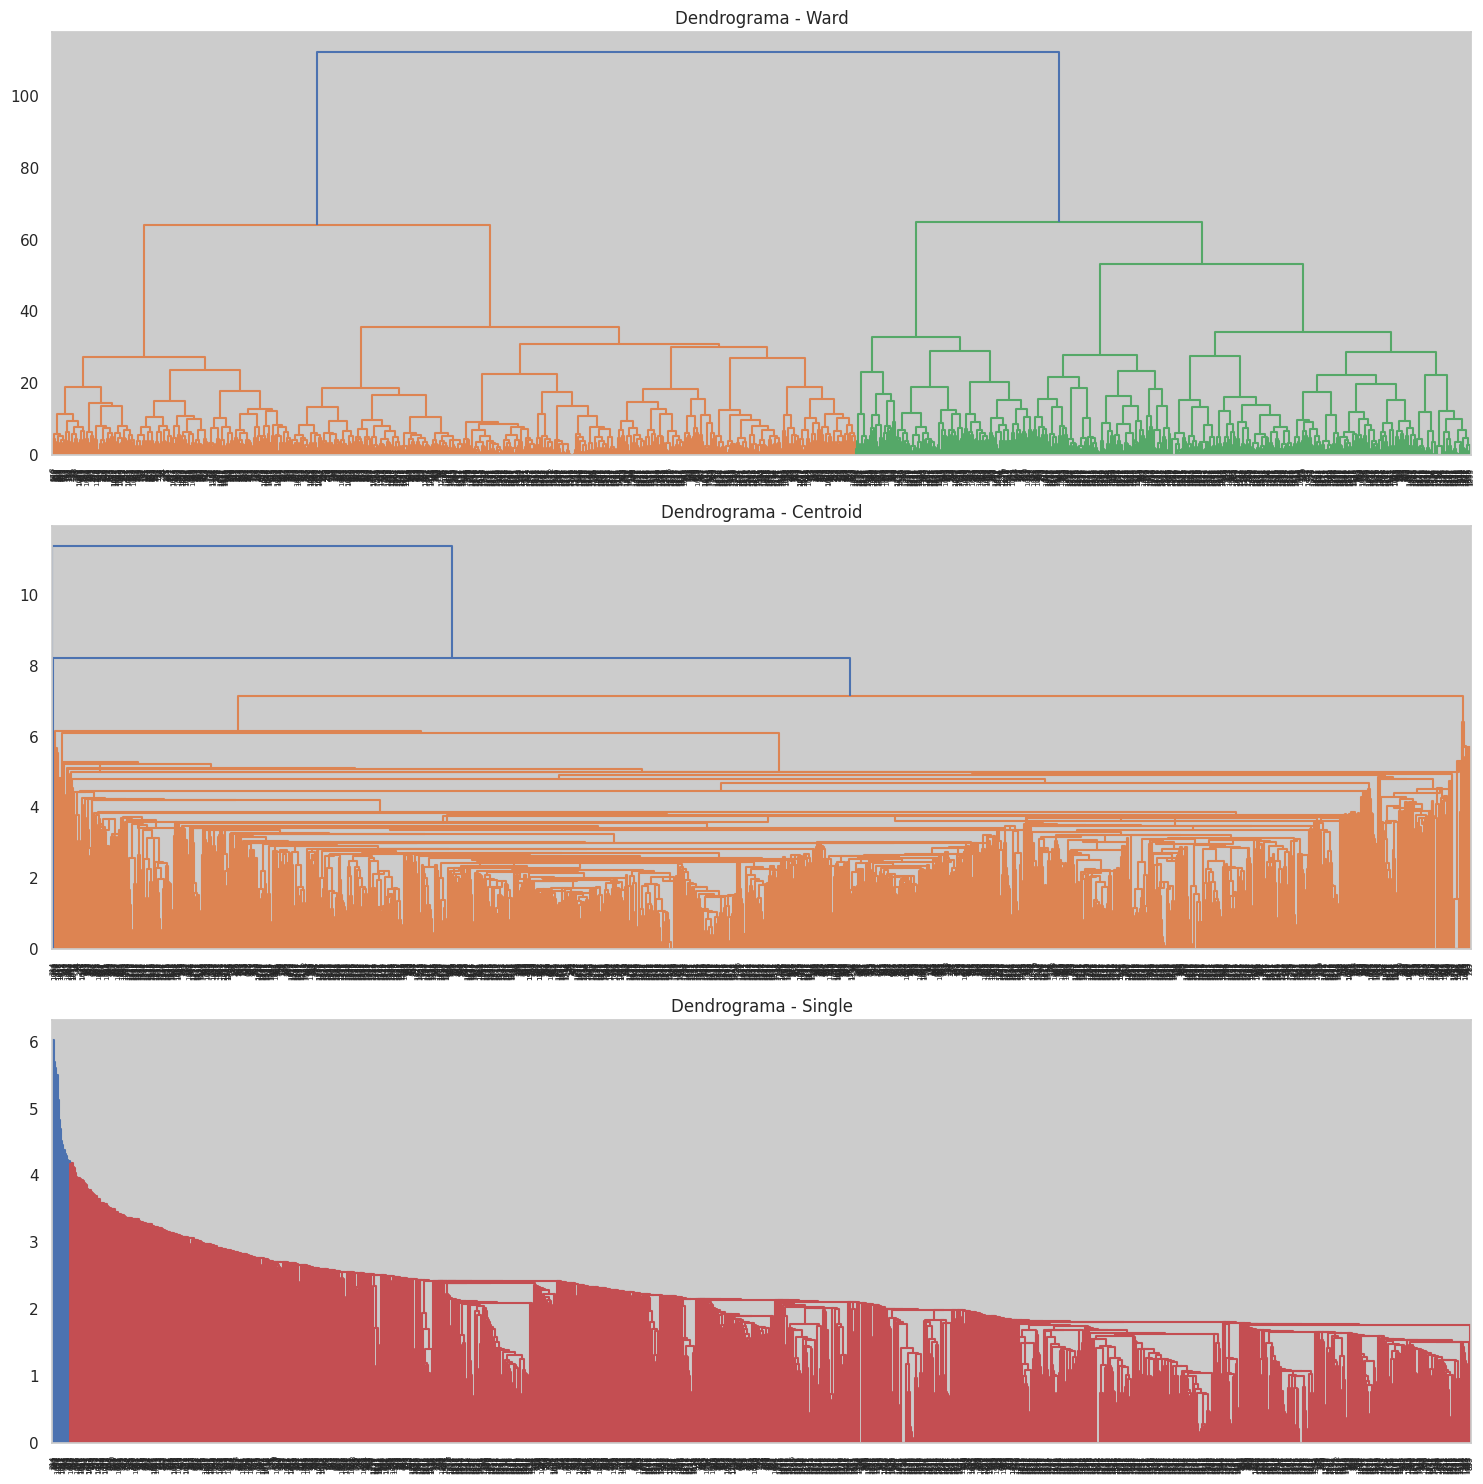

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Prepara el dataset eliminando columnas no numéricas y filtrando solo columnas numéricas
df_dendogramas = df_agrupamiento.copy()
df_dendogramas = df_dendogramas.select_dtypes(include=[np.number])  # Filtra columnas numéricas

# Función para calcular el índice cofenético y el Silhouette Score
def evaluate_dendrogram(data, method):
    # Calcula la matriz de enlace jerárquico con el método especificado
    linkage_matrix = sch.linkage(data, method=method)

    # Índice cofenético: mide la calidad del dendrograma respecto a las distancias originales
    coph_dist, _ = sch.cophenet(linkage_matrix, pdist(data))

    # Genera etiquetas de clústeres cortando el dendrograma en un número fijo de clústeres
    num_clusters = 4  # Número de clústeres (puede ajustarse)
    cluster_labels = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    # Calcula el índice Silhouette para evaluar la cohesión y separación de los clústeres
    silhouette = silhouette_score(data, cluster_labels)

    return coph_dist, silhouette

# Métodos de linkage a evaluar
linkage_methods = ['ward', 'centroid', 'single']

# Configuración dinámica para los gráficos
graph_rows = len(linkage_methods)  # Número de métodos
plt.figure(figsize=(15, 5 * graph_rows))  # Ajustar altura dinámica según el número de métodos

# Generar gráficos y calcular métricas para cada método
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(graph_rows, 1, i)  # Crear subgráfico
    plt.title(f"Dendrograma - {method.capitalize()}")

    # Generar dendrograma
    linkage_matrix = sch.linkage(df_dendogramas, method=method)
    dend = sch.dendrogram(linkage_matrix)

    # Calcular índices cofenético y silhouette
    coph, silhouette = evaluate_dendrogram(df_dendogramas, method=method)
    print(f"Índice cofenético ({method}): {coph:.4f}")
    print(f"Silhouette Score ({method}): {silhouette:.4f}\n")

# Mostrar todos los gráficos
plt.tight_layout()
plt.show()


Índice Cophenético: 0.4521
Silhouette Score: 0.1175


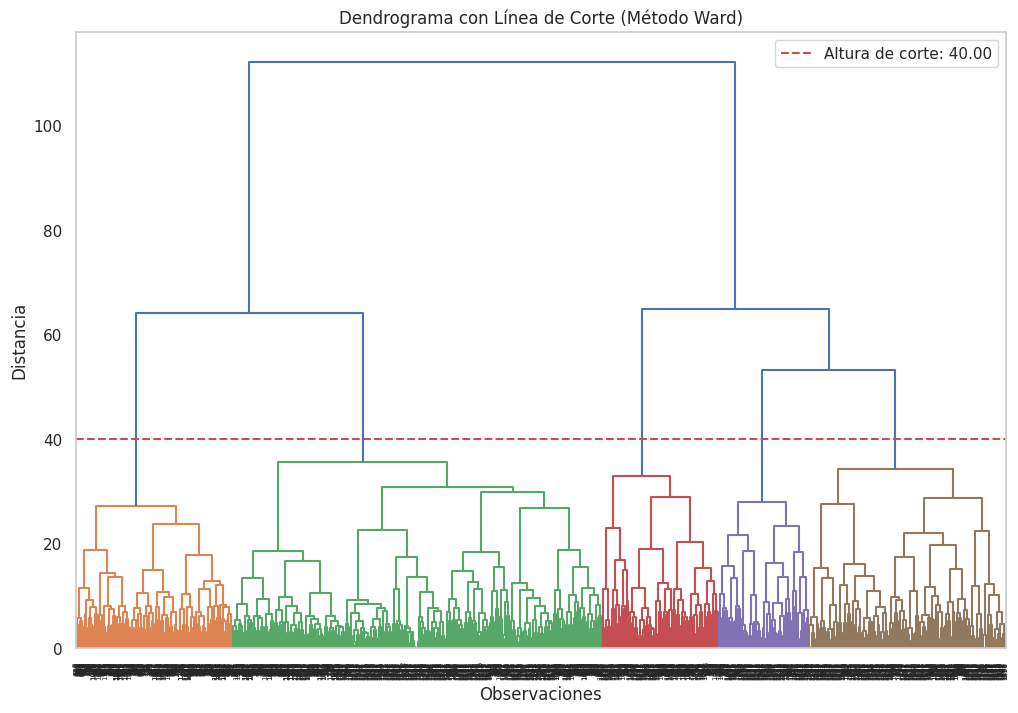

Número de clusters obtenidos: 5
Distribución de observaciones por cluster: {3: 248, 1: 335, 2: 790, 5: 421, 4: 192}
Índice Cophenético con este corte: 0.4521


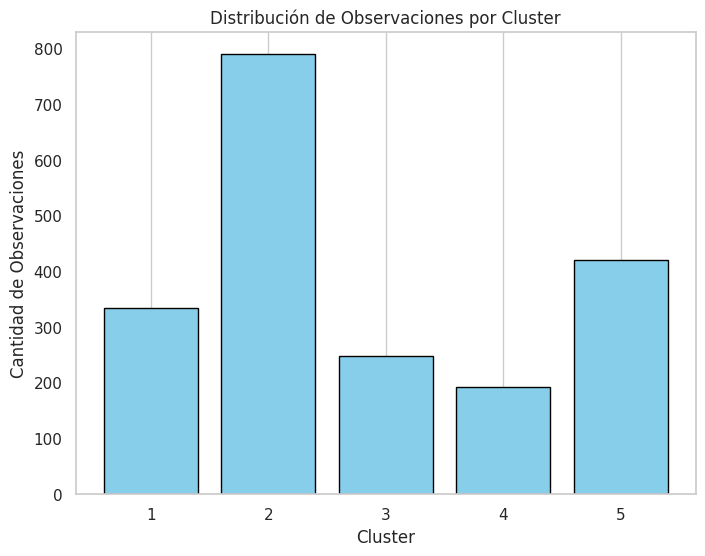

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from collections import Counter

# Supongamos que `df_dendogramas` es tu conjunto de datos.
# Realizamos el clustering jerárquico con el método Ward.
linkage_ward = sch.linkage(pdist(df_dendogramas), method='ward')

# Calculamos el índice cophenético
coph_dist, coph_matrix = sch.cophenet(linkage_ward, pdist(df_dendogramas))

# Mostramos el índice cophenético
print(f"Índice Cophenético: {coph_dist:.4f}")

# Definimos la altura de corte directamente en 40
altura_corte = 40

# Cortamos el dendrograma a la altura especificada
cluster_labels = sch.fcluster(linkage_ward, t=altura_corte, criterion='distance')

# Añadimos las etiquetas de los clusters al DataFrame original
df_dendogramas['Cluster'] = cluster_labels

# Contamos el número de clusters obtenidos y la distribución de observaciones por cluster
num_clusters = len(np.unique(cluster_labels))
cluster_distribution = Counter(cluster_labels)

# Calculamos el Silhouette Score
silhouette_avg = silhouette_score(df_dendogramas.drop(columns='Cluster'), cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Graficamos el dendrograma con la línea de corte
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage_ward, color_threshold=altura_corte)
plt.axhline(y=altura_corte, color='r', linestyle='--', label=f'Altura de corte: {altura_corte:.2f}')
plt.title("Dendrograma con Línea de Corte (Método Ward)")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.legend()
plt.grid()
plt.show()

# Mostramos el número de clusters, la distribución de observaciones y el índice cophenético
print(f"Número de clusters obtenidos: {num_clusters}")
print(f"Distribución de observaciones por cluster: {dict(cluster_distribution)}")
print(f"Índice Cophenético con este corte: {coph_dist:.4f}")

# Graficamos la distribución de observaciones por cluster
plt.figure(figsize=(8, 6))
plt.bar(cluster_distribution.keys(), cluster_distribution.values(), color='skyblue', edgecolor='black')
plt.title("Distribución de Observaciones por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Observaciones")
plt.xticks(ticks=list(cluster_distribution.keys()))
plt.grid(axis='y')
plt.show()


Porcentaje de Response=1 por cluster:
Cluster
5    0.774347
4    0.661458
2    0.534177
3    0.379032
1    0.071642
Name: Response, dtype: float64


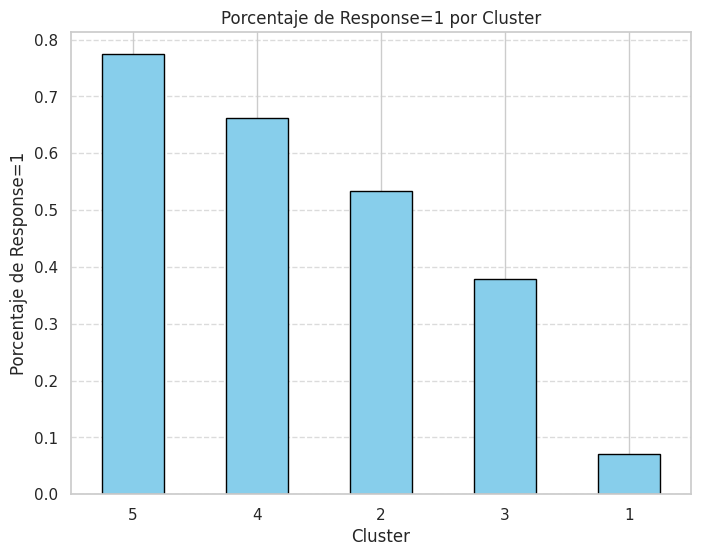

In [ ]:
# Añadir la columna 'Response' desde el DataFrame df_balanced al DataFrame df_dendogramas
df_dendogramas['Response'] = df_balanced['Response']

# Añadir las etiquetas de los clusters al dataset original
df_dendogramas['Cluster'] = cluster_labels

# Analizar la relación entre los clusters y 'Response'
response_analysis = df_dendogramas.groupby('Cluster')['Response'].mean().sort_values(ascending=False)

# Mostrar el análisis
print("Porcentaje de Response=1 por cluster:")
print(response_analysis)

# Graficar los resultados
plt.figure(figsize=(8, 6))
response_analysis.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Porcentaje de Response=1 por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Porcentaje de Response=1")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
